In [1]:
import numpy as np
from astropy.coordinates import SkyCoord
from astropy.io import fits
import healpy as hp
import matplotlib.pyplot as plt
import time
import sys
from pixell import enmap, enplot, reproject, utils, curvedsky, wcsutils
from matplotlib import cm
from scipy.optimize import curve_fit
from scipy.linalg import sqrtm
from tqdm import tqdm
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import pandas as pd
from matplotlib import font_manager

---

# Real

## ACT

In [ ]:
actmap = enmap.read_map("data/act_dr5.01_s08s18_AA_f090_daynight_map.fits")
windowlen = 1.8
map_pix = actmap

awd = pd.read_csv('data/awd.csv', skiprows = 0)
zs = [0, 0.32, 100]
rhs = [0, 27, 100000]

stacks90 = []
lens = []
riches = []
reds = []
for j in range(len(zs)):
    for k in range(len(rhs)):
        stack_CMB_kSZ           = 0
        stack_CMB_kSZ_deproject = 0
        c = 0
        riches.append(rhs[k])
        reds.append(zs[j])
        if j == len(zs)-1:
            if k == len(rhs)-1:
                print(zs[j],0)
                print(rhs[k],0)
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
            else:
                print(zs[j],0)
                print(rhs[k+1],rhs[k])
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)
        elif k == len(rhs)-1:
            print(zs[j+1],zs[j])
            print(rhs[k],0)
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
        else:
            print(zs[j+1],zs[j])
            print(rhs[k+1],rhs[k])
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)

        N = len(ras)
        lens.append(N)

        for i in tqdm(range(N)):
            stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

            if stamp is None:
                continue
            elif stamp[0][0][0]==0.0:
                continue

            stack_CMB_kSZ += stamp
            c += 1

        stack_CMB_kSZ /= c
        stack_CMB_kSZ_deproject /= c

        stacks90.append(stack_CMB_kSZ[0])

In [ ]:
actmap = enmap.read_map("data/act_dr5.01_s08s18_AA_f150_daynight_map.fits")
windowlen = 5
map_pix = actmap

awd = pd.read_csv('data/ard_not_adv.csv', skiprows = 0)
zs = [0, 100]
rhs = [0, 100000]

stacks150 = []
lens = []
riches = []
reds = []
for j in range(len(zs)):
    for k in range(len(rhs)):
        stack_CMB_kSZ           = 0
        stack_CMB_kSZ_deproject = 0
        c = 0
        riches.append(rhs[k])
        reds.append(zs[j])
        if j == len(zs)-1:
            if k == len(rhs)-1:
                print(zs[j],0)
                print(rhs[k],0)
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
            else:
                print(zs[j],0)
                print(rhs[k+1],rhs[k])
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)
        elif k == len(rhs)-1:
            print(zs[j+1],zs[j])
            print(rhs[k],0)
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
        else:
            print(zs[j+1],zs[j])
            print(rhs[k+1],rhs[k])
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)

        N = len(ras)
        lens.append(N)

        for i in tqdm(range(N)):
            stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

            if stamp is None:
                continue
            elif stamp[0][0][0]==0.0:
                continue

            stack_CMB_kSZ += stamp
            c += 1

        stack_CMB_kSZ /= c
        stack_CMB_kSZ_deproject /= c

        stacks150.append(stack_CMB_kSZ[0])

In [ ]:
actmap = enmap.read_map("data/act_dr5.01_s08s18_AA_f220_daynight_map.fits")
windowlen = 1.8
map_pix = actmap

awd = pd.read_csv('data/awd.csv', skiprows = 0)
zs = [0, 0.32, 100]
rhs = [0, 27, 100000]

stacks220 = []
lens = []
riches = []
reds = []
for j in range(len(zs)):
    for k in range(len(rhs)):
        stack_CMB_kSZ           = 0
        stack_CMB_kSZ_deproject = 0
        c = 0
        riches.append(rhs[k])
        reds.append(zs[j])
        if j == len(zs)-1:
            if k == len(rhs)-1:
                print(zs[j],0)
                print(rhs[k],0)
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
            else:
                print(zs[j],0)
                print(rhs[k+1],rhs[k])
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)
        elif k == len(rhs)-1:
            print(zs[j+1],zs[j])
            print(rhs[k],0)
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
        else:
            print(zs[j+1],zs[j])
            print(rhs[k+1],rhs[k])
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)

        N = len(ras)
        lens.append(N)

        for i in tqdm(range(N)):
            stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

            if stamp is None:
                continue
            elif stamp[0][0][0]==0.0:
                continue

            stack_CMB_kSZ += stamp
            c += 1

        stack_CMB_kSZ /= c
        stack_CMB_kSZ_deproject /= c

        stacks220.append(stack_CMB_kSZ[0])

## Planck

In [ ]:
pl = hp.read_map("data/HFI_SkyMap_100-field-IQU_2048_R3.00_full.fits")
pl[pl<-1e23]=0
windowlen = 10

shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix = reproject.enmap_from_healpix(pl,shape=shape,wcs=wcs)

awd = pd.read_csv('data/awd.csv', skiprows = 0)
zs = [0, 0.32, 100]
rhs = [0, 27, 100000]

stacks100 = []
lens = []
riches = []
reds = []
for j in range(len(zs)):
    for k in range(len(rhs)):
        stack_CMB_kSZ           = 0
        stack_CMB_kSZ_deproject = 0
        c = 0
        riches.append(rhs[k])
        reds.append(zs[j])
        if j == len(zs)-1:
            if k == len(rhs)-1:
                print(zs[j],0)
                print(rhs[k],0)
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
            else:
                print(zs[j],0)
                print(rhs[k+1],rhs[k])
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)
        elif k == len(rhs)-1:
            print(zs[j+1],zs[j])
            print(rhs[k],0)
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
        else:
            print(zs[j+1],zs[j])
            print(rhs[k+1],rhs[k])
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)

        N = len(ras)
        lens.append(N)

        for i in tqdm(range(N)):
            stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

            if stamp is None:
                continue
            elif stamp[0][0][0]==0.0:
                continue

            stack_CMB_kSZ += stamp
            c += 1

        stack_CMB_kSZ /= c
        stack_CMB_kSZ_deproject /= c

        stacks100.append(stack_CMB_kSZ[0])

In [ ]:
pl = hp.read_map("data/HFI_SkyMap_143-field-IQU_2048_R3.00_full.fits")
pl[pl<-1e23]=0
windowlen = 10

shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix = reproject.enmap_from_healpix(pl,shape=shape,wcs=wcs)

awd = pd.read_csv('data/awd.csv', skiprows = 0)
zs = [0, 0.32, 100]
rhs = [0, 27, 100000]

stacks143 = []
lens = []
riches = []
reds = []
for j in range(len(zs)):
    for k in range(len(rhs)):
        stack_CMB_kSZ           = 0
        stack_CMB_kSZ_deproject = 0
        c = 0
        riches.append(rhs[k])
        reds.append(zs[j])
        if j == len(zs)-1:
            if k == len(rhs)-1:
                print(zs[j],0)
                print(rhs[k],0)
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
            else:
                print(zs[j],0)
                print(rhs[k+1],rhs[k])
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)
        elif k == len(rhs)-1:
            print(zs[j+1],zs[j])
            print(rhs[k],0)
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
        else:
            print(zs[j+1],zs[j])
            print(rhs[k+1],rhs[k])
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)

        N = len(ras)
        lens.append(N)

        for i in tqdm(range(N)):
            stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

            if stamp is None:
                continue
            elif stamp[0][0][0]==0.0:
                continue

            stack_CMB_kSZ += stamp
            c += 1

        stack_CMB_kSZ /= c
        stack_CMB_kSZ_deproject /= c

        stacks143.append(stack_CMB_kSZ[0])

In [ ]:
pl = hp.read_map("data/HFI_SkyMap_217-field-IQU_2048_R3.00_full.fits")
pl[pl<-1e23]=0
windowlen = 10

shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix = reproject.enmap_from_healpix(pl,shape=shape,wcs=wcs)

awd = pd.read_csv('data/awd.csv', skiprows = 0)
zs = [0, 0.32, 100]
rhs = [0, 27, 100000]

stacks217 = []
lens = []
riches = []
reds = []
for j in range(len(zs)):
    for k in range(len(rhs)):
        stack_CMB_kSZ           = 0
        stack_CMB_kSZ_deproject = 0
        c = 0
        riches.append(rhs[k])
        reds.append(zs[j])
        if j == len(zs)-1:
            if k == len(rhs)-1:
                print(zs[j],0)
                print(rhs[k],0)
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
            else:
                print(zs[j],0)
                print(rhs[k+1],rhs[k])
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)
        elif k == len(rhs)-1:
            print(zs[j+1],zs[j])
            print(rhs[k],0)
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
        else:
            print(zs[j+1],zs[j])
            print(rhs[k+1],rhs[k])
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)

        N = len(ras)
        lens.append(N)

        for i in tqdm(range(N)):
            stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

            if stamp is None:
                continue
            elif stamp[0][0][0]==0.0:
                continue

            stack_CMB_kSZ += stamp
            c += 1

        stack_CMB_kSZ /= c
        stack_CMB_kSZ_deproject /= c

        stacks217.append(stack_CMB_kSZ[0])

In [ ]:
awd

In [ ]:
pl = hp.read_map("data/HFI_SkyMap_353-psb-field-IQU_2048_R3.00_full.fits")
pl[pl<-1e23]=0
windowlen = 10

shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix = reproject.enmap_from_healpix(pl,shape=shape,wcs=wcs)

awd = pd.read_csv('data/wh22.csv', skiprows = 0)
zs = [1, 100]
rhs = [0, 100000]

stacks353 = []
lens = []
riches = []
reds = []
for j in range(len(zs)):
    for k in range(len(rhs)):
        stack_CMB_kSZ           = 0
        stack_CMB_kSZ_deproject = 0
        c = 0
        riches.append(rhs[k])
        reds.append(zs[j])
        if j == len(zs)-1:
            if k == len(rhs)-1:
                print(zs[j],0)
                print(rhs[k],0)
                ras = awd[(awd.z<zs[j]) & (awd.z>0) & (awd.m<rhs[k]) & (awd.m>0)]['ra'].reset_index(drop=True)
                decs = awd[(awd.z<zs[j]) & (awd.z>0) & (awd.m<rhs[k]) & (awd.m>0)]['dec'].reset_index(drop=True)
            else:
                print(zs[j],0)
                print(rhs[k+1],rhs[k])
                ras = awd[(awd.z<zs[j]) & (awd.z>0) & (awd.m<rhs[k+1]) & (awd.m>rhs[k])]['ra'].reset_index(drop=True)
                decs = awd[(awd.z<zs[j]) & (awd.z>0) & (awd.m<rhs[k+1]) & (awd.m>rhs[k])]['dec'].reset_index(drop=True)
        elif k == len(rhs)-1:
            print(zs[j+1],zs[j])
            print(rhs[k],0)
            ras = awd[(awd.z<zs[j+1]) & (awd.z>zs[j]) & (awd.m<rhs[k]) & (awd.m>0)]['ra'].reset_index(drop=True)
            decs = awd[(awd.z<zs[j+1]) & (awd.z>zs[j]) & (awd.m<rhs[k]) & (awd.m>0)]['dec'].reset_index(drop=True)
        else:
            print(zs[j+1],zs[j])
            print(rhs[k+1],rhs[k])
            ras = awd[(awd.z<zs[j+1]) & (awd.z>zs[j]) & (awd.m<rhs[k+1]) & (awd.m>rhs[k])]['ra'].reset_index(drop=True)
            decs = awd[(awd.z<zs[j+1]) & (awd.z>zs[j]) & (awd.m<rhs[k+1]) & (awd.m>rhs[k])]['dec'].reset_index(drop=True)

        N = len(ras)
        lens.append(N)

        for i in tqdm(range(N)):
            stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

            if stamp is None:
                continue
            elif stamp[0][0][0]==0.0:
                continue

            stack_CMB_kSZ += stamp
            c += 1

        stack_CMB_kSZ /= c
        stack_CMB_kSZ_deproject /= c

        stacks353.append(stack_CMB_kSZ[0])

In [ ]:
pl = hp.read_map("data/HFI_SkyMap_545-field-Int_2048_R3.00_full.fits")
pl[pl<-1e23]=0
windowlen = 10

shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix = reproject.enmap_from_healpix(pl,shape=shape,wcs=wcs)

awd = pd.read_csv('data/ard_not_adv.csv', skiprows = 0)
zs = [0, 100]
rhs = [0, 100000]

stacks545 = []
lens = []
riches = []
reds = []
for j in range(len(zs)):
    for k in range(len(rhs)):
        stack_CMB_kSZ           = 0
        stack_CMB_kSZ_deproject = 0
        c = 0
        riches.append(rhs[k])
        reds.append(zs[j])
        if j == len(zs)-1:
            if k == len(rhs)-1:
                print(zs[j],0)
                print(rhs[k],0)
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
            else:
                print(zs[j],0)
                print(rhs[k+1],rhs[k])
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)
        elif k == len(rhs)-1:
            print(zs[j+1],zs[j])
            print(rhs[k],0)
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
        else:
            print(zs[j+1],zs[j])
            print(rhs[k+1],rhs[k])
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)

        N = len(ras)
        lens.append(N)

        for i in tqdm(range(N)):
            stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

            if stamp is None:
                continue
            elif stamp[0][0][0]==0.0:
                continue

            stack_CMB_kSZ += stamp
            c += 1

        stack_CMB_kSZ /= c
        stack_CMB_kSZ_deproject /= c

        stacks545.append(stack_CMB_kSZ[0])

In [ ]:
pl = hp.read_map("data/HFI_SkyMap_857-field-Int_2048_R3.00_full.fits")
pl[pl<-1e23]=0
windowlen = 10

shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix = reproject.enmap_from_healpix(pl,shape=shape,wcs=wcs)

awd = pd.read_csv('data/wh22.csv', skiprows = 0)
awd = awd[awd.z>=1]
zs = [1, 100]
rhs = [0, 100000]

stacks857 = []
lens = []
riches = []
reds = []
# for j in range(len(zs)):
#     for k in range(len(rhs)):
stack_CMB_kSZ           = 0
stack_CMB_kSZ_deproject = 0
c = 0
#         riches.append(rhs[k])
#         reds.append(zs[j])
#         if j == len(zs)-1:
#             if k == len(rhs)-1:
#                 print(zs[j],0)
#                 print(rhs[k],0)
#                 ras = awd['ra'].reset_index(drop=True)
#                 decs = awd['dec'].reset_index(drop=True)
#             else:
#                 print(zs[j],0)
#                 print(rhs[k+1],rhs[k])
#                 ras = awd['ra'].reset_index(drop=True)
#                 decs = awd['dec'].reset_index(drop=True)
#         elif k == len(rhs)-1:
#             print(zs[j+1],zs[j])
#             print(rhs[k],0)
#             ras = awd[(awd.z<zs[j+1]) & (awd.z>zs[j]) & (awd.m<rhs[k]) & (awd.m>0)]['ra'].reset_index(drop=True)
#             decs = awd[(awd.z<zs[j+1]) & (awd.z>zs[j]) & (awd.m<rhs[k]) & (awd.m>0)]['dec'].reset_index(drop=True)
#         else:
#             print(zs[j+1],zs[j])
#             print(rhs[k+1],rhs[k])
#             ras = awd[(awd.z<zs[j+1]) & (awd.z>zs[j]) & (awd.m<rhs[k+1]) & (awd.m>rhs[k])]['ra'].reset_index(drop=True)
#             decs = awd[(awd.z<zs[j+1]) & (awd.z>zs[j]) & (awd.m<rhs[k+1]) & (awd.m>rhs[k])]['dec'].reset_index(drop=True)

ras = awd['ra'].reset_index(drop=True)
decs = awd['dec'].reset_index(drop=True)

N = len(ras)
lens.append(N)

for i in tqdm(range(N)):
    stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

    if stamp is None:
        continue
    elif stamp[0][0][0]==0.0:
        continue

    stack_CMB_kSZ += stamp
    c += 1

stack_CMB_kSZ /= c
stack_CMB_kSZ_deproject /= c

stacks857.append(stack_CMB_kSZ[0])

In [ ]:
ros = hp.read_map("data/rass_healpix_countsec.fits")
mask = hp.read_map("data/mask_comprass.fits")
ros[ros<-1e23]=0
masked_ros = []
for i in tqdm(range(len(mask))):
    masked_ros.append(0)
    if mask[i]:
        masked_ros[i]=ros[i]
masked_ros = np.array(masked_ros)
windowlen = 10

shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix = reproject.enmap_from_healpix(masked_ros,shape=shape,wcs=wcs)

awd = pd.read_csv('data/ard_not_adv.csv', skiprows = 0)
zs = [0, 100]
rhs = [0, 100000]

stacksros = []
lens = []
riches = []
reds = []
for j in range(len(zs)):
    for k in range(len(rhs)):
        stack_CMB_kSZ           = 0
        stack_CMB_kSZ_deproject = 0
        c = 0
        riches.append(rhs[k])
        reds.append(zs[j])
        if j == len(zs)-1:
            if k == len(rhs)-1:
                print(zs[j],0)
                print(rhs[k],0)
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
            else:
                print(zs[j],0)
                print(rhs[k+1],rhs[k])
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)
        elif k == len(rhs)-1:
            print(zs[j+1],zs[j])
            print(rhs[k],0)
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
        else:
            print(zs[j+1],zs[j])
            print(rhs[k+1],rhs[k])
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)

        N = len(ras)
        lens.append(N)

        for i in tqdm(range(N)):
            stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

            if stamp is None:
                continue
            elif stamp[0][0][0]==0.0:
                continue

            stack_CMB_kSZ += stamp
            c += 1

        stack_CMB_kSZ /= c
        stack_CMB_kSZ_deproject /= c

        stacksros.append(stack_CMB_kSZ[0])

---

---

---

---

# Non-clusters

## ACT

In [ ]:
actmap = enmap.read_map("data/act_dr5.01_s08s18_AA_f090_daynight_map.fits")
windowlen = 1.8
map_pix = actmap

awd = pd.read_csv('data/voids.csv', skiprows = 0)
stacks90 = []
lens = []

stack_CMB_kSZ           = 0
stack_CMB_kSZ_deproject = 0
c = 0
ras = awd.ras
decs = awd.decs
N = len(ras)
lens.append(N)

for i in tqdm(range(N)):
    stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

    if stamp is None:
        continue
    elif stamp[0][0][0]==0.0:
        continue

    stack_CMB_kSZ += stamp
    c += 1

stack_CMB_kSZ /= c
stack_CMB_kSZ_deproject /= c

stacks90.append(stack_CMB_kSZ[0])

In [ ]:
actmap = enmap.read_map("data/act_dr5.01_s08s18_AA_f150_daynight_map.fits")
windowlen = 1.8
map_pix = actmap

awd = pd.read_csv('data/voids.csv', skiprows = 0)
stacks150 = []
lens = []

stack_CMB_kSZ           = 0
stack_CMB_kSZ_deproject = 0
c = 0
ras = awd.ras
decs = awd.decs
N = len(ras)
lens.append(N)

for i in tqdm(range(N)):
    stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

    if stamp is None:
        continue
    elif stamp[0][0][0]==0.0:
        continue

    stack_CMB_kSZ += stamp
    c += 1

stack_CMB_kSZ /= c
stack_CMB_kSZ_deproject /= c

stacks150.append(stack_CMB_kSZ[0])

In [ ]:
actmap = enmap.read_map("data/act_dr5.01_s08s18_AA_f220_daynight_map.fits")
windowlen = 1.8
map_pix = actmap

awd = pd.read_csv('data/voids.csv', skiprows = 0)
stacks220 = []
lens = []

stack_CMB_kSZ           = 0
stack_CMB_kSZ_deproject = 0
c = 0
ras = awd.ras
decs = awd.decs
N = len(ras)
lens.append(N)

for i in tqdm(range(N)):
    stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

    if stamp is None:
        continue
    elif stamp[0][0][0]==0.0:
        continue

    stack_CMB_kSZ += stamp
    c += 1

stack_CMB_kSZ /= c
stack_CMB_kSZ_deproject /= c

stacks220.append(stack_CMB_kSZ[0])

## Planck

In [ ]:
pl = hp.read_map("data/HFI_SkyMap_100-field-IQU_2048_R3.00_full.fits")
pl[pl<-1e23]=0
windowlen = 10

shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix = reproject.enmap_from_healpix(pl,shape=shape,wcs=wcs)

awd = pd.read_csv('data/voids.csv', skiprows = 0)
stacks100 = []
lens = []

stack_CMB_kSZ           = 0
stack_CMB_kSZ_deproject = 0
c = 0
ras = awd.ras
decs = awd.decs
N = len(ras)
lens.append(N)

for i in tqdm(range(N)):
    stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

    if stamp is None:
        continue
    elif stamp[0][0][0]==0.0:
        continue

    stack_CMB_kSZ += stamp
    c += 1

stack_CMB_kSZ /= c
stack_CMB_kSZ_deproject /= c

stacks100.append(stack_CMB_kSZ[0])

In [ ]:
pl = hp.read_map("data/HFI_SkyMap_143-field-IQU_2048_R3.00_full.fits")
pl[pl<-1e23]=0
windowlen = 10

shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix = reproject.enmap_from_healpix(pl,shape=shape,wcs=wcs)

awd = pd.read_csv('data/voids.csv', skiprows = 0)
stacks143 = []
lens = []

stack_CMB_kSZ           = 0
stack_CMB_kSZ_deproject = 0
c = 0
ras = awd.ras
decs = awd.decs
N = len(ras)
lens.append(N)

for i in tqdm(range(N)):
    stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

    if stamp is None:
        continue
    elif stamp[0][0][0]==0.0:
        continue

    stack_CMB_kSZ += stamp
    c += 1

stack_CMB_kSZ /= c
stack_CMB_kSZ_deproject /= c

stacks143.append(stack_CMB_kSZ[0])

In [ ]:
pl = hp.read_map("data/HFI_SkyMap_217-field-IQU_2048_R3.00_full.fits")
pl[pl<-1e23]=0
windowlen = 10

shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix = reproject.enmap_from_healpix(pl,shape=shape,wcs=wcs)

awd = pd.read_csv('data/voids.csv', skiprows = 0)
stacks217 = []
lens = []

stack_CMB_kSZ           = 0
stack_CMB_kSZ_deproject = 0
c = 0
ras = awd.ras
decs = awd.decs
N = len(ras)
lens.append(N)

for i in tqdm(range(N)):
    stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

    if stamp is None:
        continue
    elif stamp[0][0][0]==0.0:
        continue

    stack_CMB_kSZ += stamp
    c += 1

stack_CMB_kSZ /= c
stack_CMB_kSZ_deproject /= c

stacks217.append(stack_CMB_kSZ[0])

In [ ]:
pl = hp.read_map("data/HFI_SkyMap_353-psb-field-IQU_2048_R3.00_full.fits")
pl[pl<-1e23]=0
windowlen = 10

shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix = reproject.enmap_from_healpix(pl,shape=shape,wcs=wcs)

awd = pd.read_csv('data/voids.csv', skiprows = 0)
stacks353 = []
lens = []

stack_CMB_kSZ           = 0
stack_CMB_kSZ_deproject = 0
c = 0
ras = awd.ras
decs = awd.decs
N = len(ras)
lens.append(N)

for i in tqdm(range(N)):
    stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

    if stamp is None:
        continue
    elif stamp[0][0][0]==0.0:
        continue

    stack_CMB_kSZ += stamp
    c += 1

stack_CMB_kSZ /= c
stack_CMB_kSZ_deproject /= c

stacks353.append(stack_CMB_kSZ[0])

In [ ]:
pl = hp.read_map("data/HFI_SkyMap_545-field-Int_2048_R3.00_full.fits")
pl[pl<-1e23]=0
windowlen = 10

shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix = reproject.enmap_from_healpix(pl,shape=shape,wcs=wcs)

awd = pd.read_csv('data/voids.csv', skiprows = 0)
stacks545 = []
lens = []

stack_CMB_kSZ           = 0
stack_CMB_kSZ_deproject = 0
c = 0
ras = awd.ras
decs = awd.decs
N = len(ras)
lens.append(N)

for i in tqdm(range(N)):
    stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

    if stamp is None:
        continue
    elif stamp[0][0][0]==0.0:
        continue

    stack_CMB_kSZ += stamp
    c += 1

stack_CMB_kSZ /= c
stack_CMB_kSZ_deproject /= c

stacks545.append(stack_CMB_kSZ[0])

In [ ]:
pl = hp.read_map("data/HFI_SkyMap_857-field-Int_2048_R3.00_full.fits")
pl[pl<-1e23]=0
windowlen = 10

shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix = reproject.enmap_from_healpix(pl,shape=shape,wcs=wcs)

awd = pd.read_csv('data/voids.csv', skiprows = 0)
stacks857 = []
lens = []

stack_CMB_kSZ           = 0
stack_CMB_kSZ_deproject = 0
c = 0
ras = awd.ras
decs = awd.decs
N = len(ras)
lens.append(N)

for i in tqdm(range(N)):
    stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

    if stamp is None:
        continue
    elif stamp[0][0][0]==0.0:
        continue

    stack_CMB_kSZ += stamp
    c += 1

stack_CMB_kSZ /= c
stack_CMB_kSZ_deproject /= c

stacks857.append(stack_CMB_kSZ[0])

In [ ]:
ros = hp.read_map("data/rass_healpix_countsec.fits")
mask = hp.read_map("data/mask_comprass.fits")
ros[ros<-1e23]=0
masked_ros = []
for i in tqdm(range(len(mask))):
    masked_ros.append(0)
    if mask[i]:
        masked_ros[i]=ros[i]
masked_ros = np.array(masked_ros)
windowlen = 10

shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix = reproject.enmap_from_healpix(masked_ros,shape=shape,wcs=wcs)

awd = pd.read_csv('data/voids.csv', skiprows = 0)
stacksros = []
lens = []

stack_CMB_kSZ           = 0
stack_CMB_kSZ_deproject = 0
c = 0
ras = awd.ras
decs = awd.decs
N = len(ras)
lens.append(N)

for i in tqdm(range(N)):
    stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

    if stamp is None:
        continue
    elif stamp[0][0][0]==0.0:
        continue

    stack_CMB_kSZ += stamp
    c += 1

stack_CMB_kSZ /= c
stack_CMB_kSZ_deproject /= c

stacksros.append(stack_CMB_kSZ[0])

---

---

---

---

# Real

In [ ]:
font_path = 'data/cmunrm.ttf'
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()
plt.rcParams['axes.unicode_minus'] = False

f, ax = plt.subplots(nrows=3, ncols=3,figsize=(15,15))
i = 0

for j,row in enumerate(ax):
    for k, col in enumerate(row):
        f1 = col.imshow(stacks220[i])
        col.get_xaxis().set_visible(False)
        col.get_yaxis().set_visible(False)
        plt.colorbar(mappable = f1, ax = col,orientation='horizontal',fraction=0.047, pad=0.02)
        scalebar = AnchoredSizeBar(ax[0][0].transData,
                                   4.4, '', 'center left', 
                                   pad=0.,
                                   sep=-7,
                                   color='white',
                                   frameon=False,
                                   size_vertical=0.02)
        ax[0][0].add_artist(scalebar)
        ax[0][0].text(0.1, 0.4, 'R = 10$\,$\''.format(10), c='white', fontsize=18, transform=ax[0][0].transAxes)

        col.text(0.3,0.5,"N={}".format(lens[i]),color='red')
        if j==0 and k==0:
            col.text(-5,4.2,"z<0.32",size=20)
        if j==1 and k==0:
            col.text(-5,4.2,"z>0.32",size=20)
        if j==2 and k==0:
            col.text(-5,4.2,"All z",size=20)
        if k==0 and j==0:
            col.text(3,-3,"rh<27",size=20)
        if k==1 and j==0:
            col.text(3,-3,"rh>27",size=20)
        if k==2 and j==0:
            col.text(3,-3,"All rh",size=20)

        i+=1

plt.savefig("output/stacks220_zoom.png")
plt.show()

---

# Non-clusters

In [ ]:
font_path = 'data/cmunrm.ttf'
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()
plt.rcParams['axes.unicode_minus'] = False

f, ax = plt.subplots(figsize=(5,5))
i = 0

f1 = ax.imshow(stacksros[i])
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.colorbar(mappable = f1, ax = ax,orientation='horizontal',fraction=0.047, pad=0.02)
scalebar = AnchoredSizeBar(ax.transData,
                           4.4, '', 'center left', 
                           pad=0.,
                           sep=-7,
                           color='white',
                           frameon=False,
                           size_vertical=0.02)
# ax.add_artist(scalebar)
# ax.text(0.1, 0.4, 'R = 10$\,$\''.format(10), c='white', fontsize=18, transform=ax.transAxes)

# ax.text(0.2,.7,"N={}".format(lens[i]),color='white',fontsize=20)
ax.text(0.2,7.8,"ROSAT".format(lens[i]),color='white',fontsize=20)

i+=1

plt.savefig("output/stacksros.png")
plt.show()

## NEW Work ##

In [ ]:
# Copied imports from above

import numpy as np
from astropy.coordinates import SkyCoord
from astropy.io import fits
import healpy as hp
import matplotlib.pyplot as plt
import time
import sys
from pixell import enmap, enplot, reproject, utils, curvedsky, wcsutils
from matplotlib import cm
from scipy.optimize import curve_fit
from scipy.linalg import sqrtm
from tqdm import tqdm
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import pandas as pd
from matplotlib import font_manager

In [ ]:

# Task 2 - Map of sky in a certain area

# TO get void locations
# awd = pd.read_csv("data/voids.csv", skiprows = 0).rename(columns = {"ras":"amf_ra", "decs":"amf_dec"})

# TO get ALL cluster locations (union3)
awd = pd.read_csv("data/union3.csv", skiprows = 0)

In [ ]:
# Categories
# 0 - AMF
# 1 - Zou subset DES
# 2 - Zou subset DESI
# 3 - Zou subset HSC
# 4 - WH22

# 1)  z > 1, Zou HSC
awd[(awd.z > 1) & (awd.cat == 3)]

In [ ]:
# 2)  z > 1, WH22

awd[(awd.z > 1) & (awd.cat == 4)]

In [ ]:
# 3)  0.6 < z < 1, Zou DESI

awd[(awd.z < 1) & (awd.z > 0.6) & (awd.cat == 2)]

In [ ]:
# 4)  0.6 < z < 1, Zou DES + WH22 
# DES alone doesn't have enough

awd[(awd.z < 1) & (awd.z > 0.6) & (awd.cat.isin([1, 4]))]

In [ ]:
# 5)  0.05 < z < 0.6, AMF + WH22

awd[(awd.z < 0.6) & (awd.z > 0.05) & (awd.cat.isin([0, 4]))]

In [ ]:
# 6)  0.05 < z < 0.6, Zou DESI

awd[(awd.z < 0.6) & (awd.z > 0.05) & (awd.cat == 2)]

In [ ]:
# Vertical
ver = (((90*60)/10)*(5/6))-1
ver

In [ ]:
# Horiztonal
hor = (180*60)/10-1
hor

In [ ]:
ver * hor

In [ ]:
import astropy.coordinates as coord
from astropy.coordinates import SkyCoord
from astropy import units as u
from tqdm import tqdm

# galactic coordinates
glon = []
glat = []
for lon in tqdm(np.linspace(180,360,1079)):
    for lat in np.linspace(15,90,449):
        if (lat >= -15) & (lat <= 15):
            continue
        glon.append(lon)
        glat.append(lat)
glon2 = [i*u.degree for i in glon]
glat2 = [i*u.degree for i in glat]

# convert to equitorial coordinates
c = SkyCoord(glon2, glat2, frame='galactic')
ras = c.icrs.ra.deg
decs = c.icrs.dec.deg

In [ ]:
# Algorithm Results

cluster_map = pd.read_csv("output/Locations/C2_wA/random_scan_fs.csv")
# cluster_map = cluster_map[cluster_map["clusterp"] > 0.85]

import healpy as hp
pl143 = hp.read_map('data/COM_CompMap_Compton-SZMap-nilc-ymaps_2048_R2.00.fits')
hp.mollview(pl143,norm='hist',cmap='Greys',title='Masked S/N map',cbar=False, coord = ["C", "G"])
#hp.visufunc.projscatter(glon,glat,lonlat=True)#,c=countfs,s=10,vmin=0, vmax=1)
hp.visufunc.projscatter(cluster_map['glon'],cluster_map['glat'],lonlat=True,c=cluster_map['clusterp'],s=1,vmin=0, vmax=1)

## Comparisons ##

In [ ]:
compare1 = pd.read_csv("output/Locations/C1_wA/cluster_validation.csv")
compare2 = pd.read_csv("output/Locations/C2_wA/cluster_validation.csv")

plt.hist(compare1["clusterp"],bins=100, color = "green", alpha = 0.5, density = True, label = "HSC")
plt.hist(compare2["clusterp"],bins=100, color = "red", alpha = 0.5, density = True, label = "WH22")

plt.legend()
plt.xlabel('Probability of location containing a cluster\n[Cluster validation]',size=15)
plt.title('Full sample [Planck, ACT, IRIS, ROSAT]',loc='left',size=15)
# plt.axvline(0.99,c='r')
plt.tight_layout()
# plt.savefig('c_full.png',dpi=1000)
plt.show()

In [ ]:
compare1 = pd.read_csv("output/Locations/C3_wA/cluster_validation.csv")
compare2 = pd.read_csv("output/Locations/C4_wA/cluster_validation.csv")
compare3 = pd.read_csv("output/Locations/C5_wA/cluster_validation.csv")

plt.hist(compare1["clusterp"],bins=100, color = "green", alpha = 0.4, density = True, label = "DESI")
plt.hist(compare2["clusterp"],bins=100, color = "red", alpha = 0.4, density = True, label = "Zou DES")
plt.hist(compare3["clusterp"],bins=100, color = "blue", alpha = 0.4, density = True, label = "WH22")

plt.legend()
plt.xlabel('Probability of location containing a cluster\n[Cluster validation]',size=15)
plt.title('Full sample [Planck, ACT, IRIS, ROSAT]',loc='left',size=15)
# plt.axvline(0.99,c='r')
plt.tight_layout()
# plt.savefig('c_full.png',dpi=1000)
plt.show()


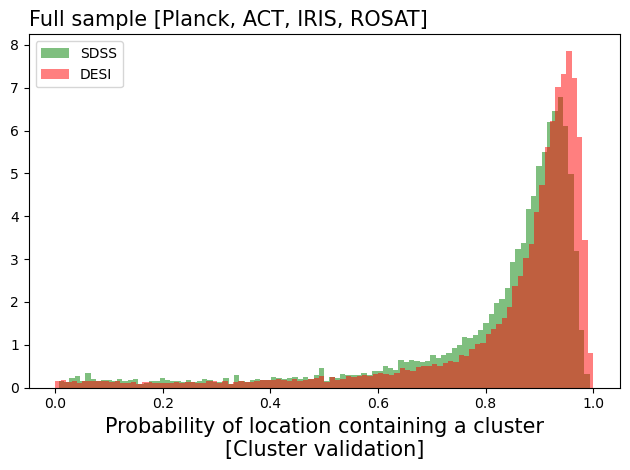

In [12]:
compare1 = pd.read_csv("output/Locations/C6_wA/cluster_validation.csv")
compare2 = pd.read_csv("output/Locations/C7_wA/cluster_validation.csv")

plt.hist(compare1["clusterp"],bins=100, color = "green", alpha = 0.5, density = True, label = "SDSS")
plt.hist(compare2["clusterp"],bins=100, color = "red", alpha = 0.5, density = True, label = "DESI")

plt.legend()
plt.xlabel('Probability of location containing a cluster\n[Cluster validation]',size=15)
plt.title('Full sample [Planck, ACT, IRIS, ROSAT]',loc='left',size=15)
# plt.axvline(0.99,c='r')
plt.tight_layout()
# plt.savefig('c_full.png',dpi=1000)
plt.show()

In [ ]:
print(len(compare1["clusterp"] > 0.8))
print(len(compare2["clusterp"] > 0.8))
print(len(compare3["clusterp"] > 0.8))

In [ ]:
# Making comparisons for the other redshift categories, and mass cuts

compare1 = pd.read_csv("output/Locations/C1_wA/noncluster_validation.csv")
compare2 = pd.read_csv("output/Locations/C2_wA/noncluster_validation.csv")

plt.hist(compare1["clusterp"],bins=150, color = "green", alpha = 0.5, density = True, label = "HSC")
plt.hist(compare2["clusterp"],bins=150, color = "red", alpha = 0.5, density = True, label = "WH22")

plt.legend()
plt.xlabel('Probability of location containing a cluster\n[Cluster validation]',size=15)
plt.title('Full sample [Planck, ACT, IRIS, ROSAT]',loc='left',size=15)
# plt.axvline(0.99,c='r')
plt.tight_layout()
# plt.savefig('c_full.png',dpi=1000)
plt.show()

In [ ]:
compare1 = pd.read_csv("output/Locations/C3_wA/noncluster_validation.csv")
compare2 = pd.read_csv("output/Locations/C4_wA/noncluster_validation.csv")
compare3 = pd.read_csv("output/Locations/C5_wA/noncluster_validation.csv")

plt.hist(compare1["clusterp"],bins=150, color = "green", alpha = 0.3, density = True, label = "DESI")
plt.hist(compare2["clusterp"],bins=150, color = "red", alpha = 0.3, density = True, label = "Zou DES")
plt.hist(compare3["clusterp"],bins=150, color = "blue", alpha = 0.3, density = True, label = "WH22")

plt.legend()
plt.xlabel('Probability of location containing a cluster\n[Cluster validation]',size=15)
plt.title('Full sample [Planck, ACT, IRIS, ROSAT]',loc='left',size=15)
# plt.axvline(0.99,c='r')
plt.tight_layout()
# plt.savefig('c_full.png',dpi=1000)
plt.show()

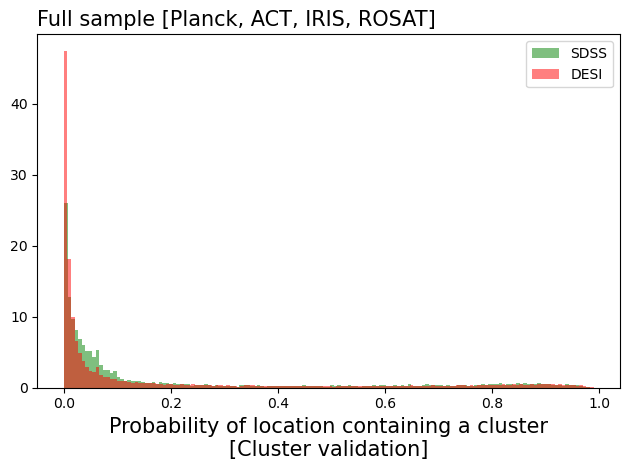

In [13]:
# Making comparisons for the other redshift categories, and mass cuts

compare1 = pd.read_csv("output/Locations/C6_wA/noncluster_validation.csv")
compare2 = pd.read_csv("output/Locations/C7_wA/noncluster_validation.csv")

plt.hist(compare1["clusterp"],bins=150, color = "green", alpha = 0.5, density = True, label = "SDSS")
plt.hist(compare2["clusterp"],bins=150, color = "red", alpha = 0.5, density = True, label = "DESI")

plt.legend()
plt.xlabel('Probability of location containing a cluster\n[Cluster validation]',size=15)
plt.title('Full sample [Planck, ACT, IRIS, ROSAT]',loc='left',size=15)
# plt.axvline(0.99,c='r')
plt.tight_layout()
# plt.savefig('c_full.png',dpi=1000)
plt.show()

### Universal Reference ###

In [ ]:
compare1 = pd.read_csv("output/Locations/C3_wA/Q1_scan_fs.csv")
compare2 = pd.read_csv("output/Locations/C5_wA/Q1_scan_fs.csv")

In [ ]:
compare2

In [ ]:
# Cross-matching
# $0.6<z<1$, $z>1$, $0.05<z<0.6$

# Assuming locations (glat, glon) have not been switched up (same order as original dataframe)

plt.scatter(compare1["clusterp"], compare2["clusterp"], s = 1, alpha = 0.5)
plt.xlabel("Zou HSC $z>1$ Cluster Probability")
plt.ylabel("WH22 $z>1$ Cluster Probability")
plt.show()

# Sky Snapshots at a Location # 

## Planck ##

In [ ]:
glat = 0
glon = 0

c = SkyCoord(glon, glat, frame='galactic', unit = 'deg')
ra = c.icrs.ra.deg
dec = c.icrs.dec.deg

(ra, dec)

In [9]:
# For the 100 GHz frequency sample
awd = pd.read_csv("data/union3.csv", skiprows = 0)

pl100 = hp.read_map("data/HFI_SkyMap_100-field-IQU_2048_R3.00_full.fits")
pl143 = hp.read_map("data/HFI_SkyMap_143-field-IQU_2048_R3.00_full.fits")
pl217 = hp.read_map("data/HFI_SkyMap_217-field-IQU_2048_R3.00_full.fits")
pl353 = hp.read_map("data/HFI_SkyMap_353-psb-field-IQU_2048_R3.00_full.fits")
pl545 = hp.read_map("data/HFI_SkyMap_545-field-Int_2048_R3.00_full.fits")
pl857 = hp.read_map("data/HFI_SkyMap_857-field-Int_2048_R3.00_full.fits")

windowlen = 10
pl100[pl100<-1e23]=0
pl143[pl143<-1e23]=0
pl217[pl217<-1e23]=0
pl353[pl353<-1e23]=0
pl545[pl545<-1e23]=0
pl857[pl857<-1e23]=0

# Create a full sky Cartesian geometry with resolution 5 arcmin / pixel
# Returns a shape and a world coordinate system?
shape, wcs = enmap.fullsky_geometry(res = 5.0*utils.arcmin, proj = "car")
map_pix_pl = list()
map_pix_pl.append(reproject.enmap_from_healpix(pl100, shape = shape, wcs = wcs))
map_pix_pl.append(reproject.enmap_from_healpix(pl143, shape = shape, wcs = wcs))
map_pix_pl.append(reproject.enmap_from_healpix(pl217, shape = shape, wcs = wcs))
map_pix_pl.append(reproject.enmap_from_healpix(pl353, shape = shape, wcs = wcs))
map_pix_pl.append(reproject.enmap_from_healpix(pl545, shape = shape, wcs = wcs))
map_pix_pl.append(reproject.enmap_from_healpix(pl857, shape = shape, wcs = wcs))

Preparing SHT
T -> alm
float64 complex128
Computing pixel positions
Computing rotated positions
Projecting
Preparing SHT
T -> alm
float64 complex128
Computing pixel positions
Computing rotated positions
Projecting
Preparing SHT
T -> alm
float64 complex128
Computing pixel positions
Computing rotated positions
Projecting
Preparing SHT
T -> alm
float64 complex128
Computing pixel positions
Computing rotated positions
Projecting
Preparing SHT
T -> alm
float64 complex128
Computing pixel positions
Computing rotated positions
Projecting
Preparing SHT
T -> alm
float64 complex128
Computing pixel positions
Computing rotated positions
Projecting


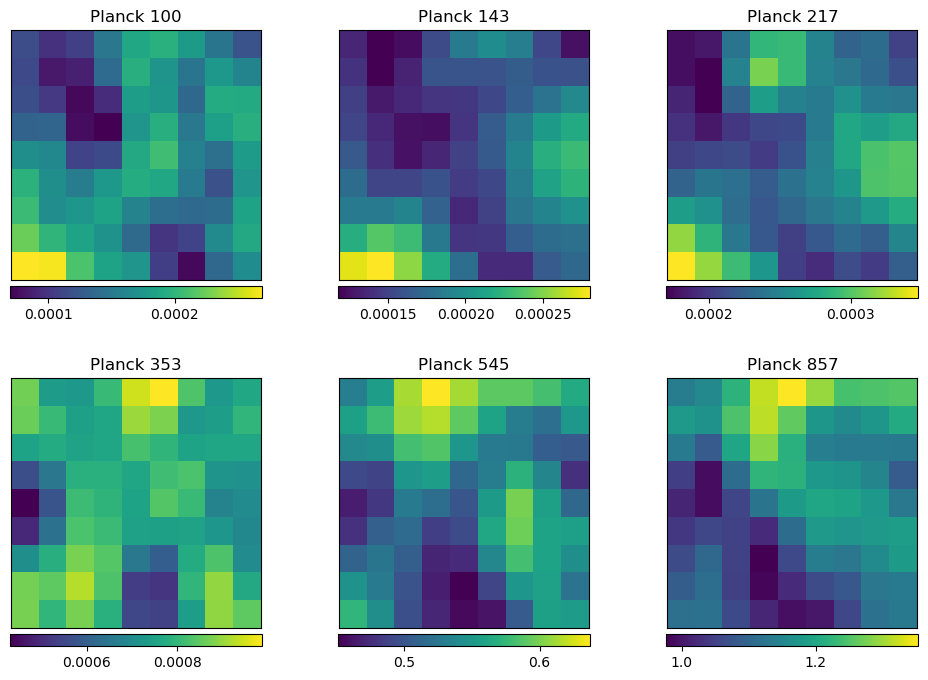

In [19]:
# Plotting Planck Images at all Planck Frequencies around an RA and DEC

# glat = -44.43037974683544
# glon = 126.45569620253166

# c = SkyCoord(glon, glat, frame='galactic', unit = 'deg')
# ra = c.icrs.ra.deg
# dec = c.icrs.dec.deg

ra = 39.27028
dec = -38.87891

windowlen = 30
planck_map_freq = [100, 143, 217, 353, 545, 857]

fig, ax = plt.subplots(2, 3, figsize=(12,8))
j = 0
for i in range(len(map_pix_pl)):
    a = i
    stamp = reproject.thumbnails(map_pix_pl[i], coords = np.deg2rad([dec, ra]), r = windowlen*utils.arcmin)
    if i >= 3:
        a -= 3
        j = 1
    f1 = ax[j,a].imshow(stamp[0]) 
    ax[j,a].get_xaxis().set_visible(False)
    ax[j,a].get_yaxis().set_visible(False)
    ax[j,a].set_title("Planck " + str(planck_map_freq[i]))
    c_bar = plt.colorbar(mappable = f1, ax = ax[j,a], orientation = "horizontal", fraction = 0.047, pad = 0.02)
    c_bar.ax.locator_params(nbins=3)
    scalebar = AnchoredSizeBar(ax[j,a].transData,
                              4.4, "", "center left",
                              pad = 0,
                              sep = 7,
                              color = "white",
                              frameon = False,
                              size_vertical = 0.02)
    fig.subplots_adjust(wspace=0.2, hspace = 0.3)
plt.show()

## ACT ##

In [11]:
# For ACT frequency samples

act_90 = enmap.read_map("data/act_dr5.01_s08s18_AA_f090_daynight_map.fits")
act_150 = enmap.read_map("data/act_dr5.01_s08s18_AA_f150_daynight_map.fits")
act_220 = enmap.read_map("data/act_dr5.01_s08s18_AA_f220_daynight_map.fits")

windowlen = 1.8

map_pix_act = list()
map_pix_act.append(act_90)
map_pix_act.append(act_150)
map_pix_act.append(act_220)


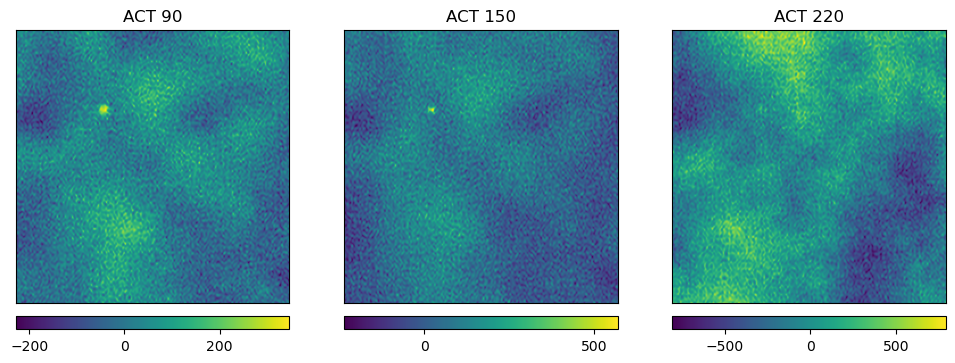

In [26]:
# Plotting ACT Images at all ACT Frequencies around an RA and DEC

# glat = -44.43037974683544
# glon = 126.45569620253166

# c = SkyCoord(glon, glat, frame='galactic', unit = 'deg')
# ra = c.icrs.ra.deg
# dec = c.icrs.dec.deg

ra = 39.27028
dec = -38.87891

windowlen = 30
act_map_freq = [90, 150, 220]

fig, ax = plt.subplots(1, 3, figsize=(12,8))
for i in range(len(map_pix_act)):
    stamp = reproject.thumbnails(map_pix_act[i], coords = np.deg2rad([dec, ra]), r = windowlen*utils.arcmin)
    f1 = ax[i].imshow(stamp[0]) 
    ax[i].get_xaxis().set_visible(False)
    ax[i].get_yaxis().set_visible(False)
    ax[i].set_title("ACT " + str(act_map_freq[i]))
    c_bar = plt.colorbar(mappable = f1, ax = ax[i], orientation = "horizontal", fraction = 0.047, pad = 0.02)
    c_bar.ax.locator_params(nbins=3)
    scalebar = AnchoredSizeBar(ax[i].transData,
                              4.4, "", "center left",
                              pad = 0,
                              sep = 7,
                              color = "white",
                              frameon = False,
                              size_vertical = 0.02)
    fig.subplots_adjust(wspace=0.2, hspace = 0.3)
plt.show()

## ROSAT ##

In [2]:
ros = hp.read_map("data/rass_healpix_countsec.fits")
mask = hp.read_map("data/mask_comprass.fits")
ros[ros<-1e23]=0
masked_ros = []
for i in tqdm(range(len(mask))):
    masked_ros.append(0)
    if mask[i]:
        masked_ros[i]=ros[i]
masked_ros = np.array(masked_ros)
windowlen = 10

shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix_ros = reproject.enmap_from_healpix(masked_ros,shape=shape,wcs=wcs)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 201326592/201326592 [01:08<00:00, 2922788.33it/s]


Preparing SHT
T -> alm
float64 complex128
Computing pixel positions
Computing rotated positions
Projecting


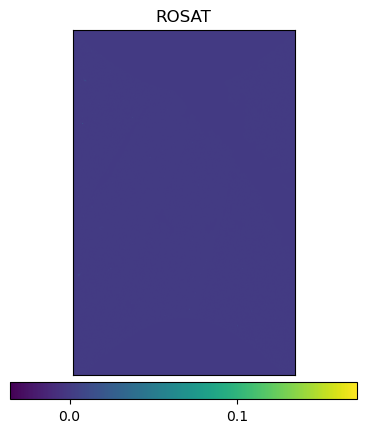

In [5]:
# Plotting ROSAT Images around an RA and DEC

# glat = -44.43037974683544
# glon = 126.45569620253166

# c = SkyCoord(glon, glat, frame='galactic', unit = 'deg')
# ra = c.icrs.ra.deg
# dec = c.icrs.dec.deg

ra = 146.075072
dec = 0.960983

windowlen = 30

fig, ax = plt.subplots(1, 1)
stamp = reproject.thumbnails(map_pix_ros, coords = np.deg2rad([dec, ra]), r = windowlen*utils.arcmin)
f1 = ax.imshow(stamp[0]) 
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title("ROSAT")
c_bar = plt.colorbar(mappable = f1, ax = ax, orientation = "horizontal", fraction = 0.047, pad = 0.02)
c_bar.ax.locator_params(nbins=3)
scalebar = AnchoredSizeBar(ax.transData,
                          4.4, "", "center left",
                          pad = 0,
                          sep = 7,
                          color = "white",
                          frameon = False,
                          size_vertical = 0.02)
fig.subplots_adjust(wspace=0.2, hspace = 0.3)
plt.show()

## IRIS ##

In [ ]:
# For IRIS frequency Samples (if we ever need it for some reason)

ir12 = hp.read_map("data/IRIS_nohole_1_2048_v2.fits")
ir25 = hp.read_map("data/IRIS_nohole_2_2048_v2.fits")
ir60 = hp.read_map("data/IRIS_nohole_3_2048_v2.fits")
ir100 = hp.read_map("data/IRIS_nohole_4_2048_v2.fits")

windowlen = 10
ir12[(ir12==-32768) | np.isnan(ir12)] = 0
ir25[(ir25==-32768) | np.isnan(ir25)] = 0
ir60[(ir60==-32768) | np.isnan(ir60)] = 0
ir100[(ir100==-32768) | np.isnan(ir100)] = 0

# Create a full sky Cartesian geometry with resolution 5 arcmin / pixel
# Returns a shape and a world coordinate system?
shape, wcs = enmap.fullsky_geometry(res = 5.0*utils.arcmin, proj = "car")
map_pix_ir = list()
map_pix_ir.append(reproject.enmap_from_healpix(ir12, shape = shape, wcs = wcs))
map_pix_ir.append(reproject.enmap_from_healpix(ir25, shape = shape, wcs = wcs))
map_pix_ir.append(reproject.enmap_from_healpix(ir60, shape = shape, wcs = wcs))
map_pix_ir.append(reproject.enmap_from_healpix(ir100, shape = shape, wcs = wcs))

In [ ]:
# glat = -44.43037974683544
# glon = 126.45569620253166

# c = SkyCoord(glon, glat, frame='galactic', unit = 'deg')
# ra = c.icrs.ra.deg
# dec = c.icrs.dec.deg

ra = 146.075072
dec = 0.960983

windowlen = 30
iris_map_freq = [12, 25, 60, 100]

fig, ax = plt.subplots(2, 2, figsize=(8,8))
j = 0
for i in range(len(map_pix_ir)):
    a = i
    stamp = reproject.thumbnails(map_pix_ir[i], coords = np.deg2rad([dec, ra]), r = windowlen*utils.arcmin)
    if i >= 2:
        a -= 2
        j = 1
    f1 = ax[j,a].imshow(stamp[0]) 
    ax[j,a].get_xaxis().set_visible(False)
    ax[j,a].get_yaxis().set_visible(False)
    ax[j,a].set_title("IRIS " + str(iris_map_freq[i]))
    c_bar = plt.colorbar(mappable = f1, ax = ax[j,a], orientation = "horizontal", fraction = 0.047, pad = 0.02)
    c_bar.ax.locator_params(nbins=3)
    scalebar = AnchoredSizeBar(ax[j,a].transData,
                              4.4, "", "center left",
                              pad = 0,
                              sep = 7,
                              color = "white",
                              frameon = False,
                              size_vertical = 0.02)
    fig.subplots_adjust(hspace = 0.3)
plt.show()

### Universal Reference ###

In [ ]:
# font_path = "data/cmunrm.ttf"
# font_manager.fontManager.addfont(font_path)
# prop = font_manager.FontProperties(fname = font_path)
# plt.rcParams["font.family"] = "sans-serif"
# plt.rcParams["font.sans-serif"] = prop.get_name()
# plt.rcParams["axes.unicode_minus"] = False

# 1. Different Training Sets
# 2. Viewing (next to each other)
# 3. Jiggling
# 4. Validation of catalogues

for i in range(len(awd.amf_ra.values)):
    dec = awd.amf_dec.values[i]
    ra = awd.amf_ra.values[i]
    
    # extract a set of thumbnail images centered on each set ofcoordinates 
    # (1 per for loop, in this case)
    stamp = reproject.thumbnails(map_pix, coords = np.deg2rad([dec, ra]), r = windowlen*utils.arcmin)
    
    f, ax = plt.subplots(figsize = (5, 5))
    
    # Display image as 2D raster (Matplotlib)
    f1 = ax.imshow(stamp[0])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.colorbar(mappable = f1, ax = ax, orientation = "horizontal", fraction = 0.047, pad = 0.02)
    scalebar = AnchoredSizeBar(ax.transData,
                              4.4, "", "center left",
                              pad = 0,
                              sep = 7,
                              color = "white",
                              frameon = False,
                              size_vertical = 0.02)
#     ax.add_artist(scalebar)
#     ax.text(0.1, 0.4, 'R = 10$\,$\''.format(10), c= "white", fontsize = 18, transform = ax.transAxes)
    
#     ax.text(0.2, 0.7, "N={}".format(lens[i]), color = "white", fontsize = 20)
    # ax.text(0.2, 7.8, "ROSAT".format(lens[i]), color = "white", fontsize = 20)
    # plt.savefig("output/stackros.png")
    
    plt.show()
    
    

In [ ]:
# Categories
# 0 - AMF
# 1 - Zou subset DES
# 2 - Zou subset DESI
# 3 - Zou subset HSC
# 4 - WH22

### ACT Map (Also in FastMap) ###

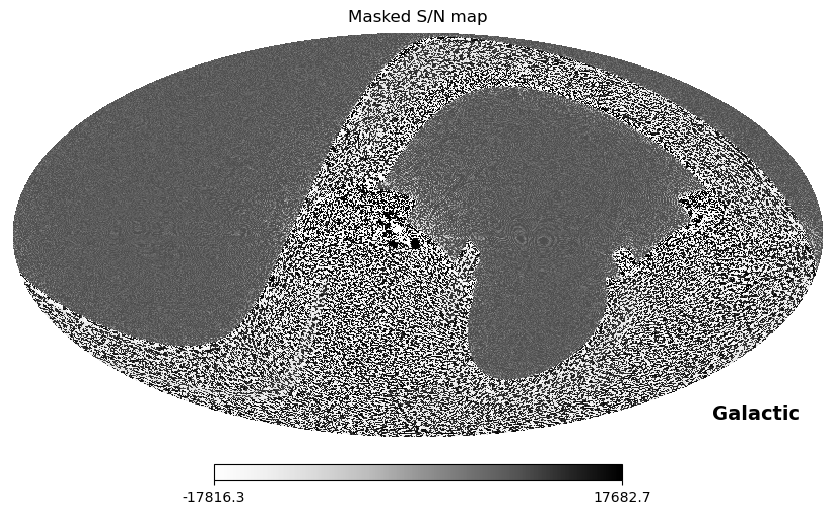

In [35]:
# Map full ACT map

# Change map to frequency needed:
# act_dr5.01_s08s18_AA_f090_daynight_map.fits
# act_dr5.01_s08s18_AA_f150_daynight_map.fits
# act_dr5.01_s08s18_AA_f220_daynight_map.fits

# Change index [0] to [1] or [2] for other ACT maps at same frequency.
# [0] - Temperature (Stokes I)
# [1] - Stokes Q
# [2] - Stokes U
act = enmap.read_map('data/act_dr5.01_s08s18_AA_f220_daynight_map.fits')[0]
map_healpix = reproject.healpix_from_enmap(act, lmax = 6000, nside = 512)

# # remove coord = [] to get Celestial. Add coord = ["C", "G"] for galactic
# # ACT map comes in celestial. Must transform to G for galactic
hp.mollview(map_healpix,norm='hist',cmap='Greys',title='Masked S/N map',cbar=True, coord = ["C", "G"])

# Plot results above it

# cluster_map = pd.read_csv("output/Locations/C1_wA/Q1_scan_fs.csv")
# hp.visufunc.projscatter(,,lonlat=True,c="r",s=100, vmin = 0, vmax = 1)


In [37]:
act.wcs

car:{cdelt:[-0.008333,0.008333],crval:[0,0],crpix:[21601.00,7561.00]}

In [38]:
new_DF = pd.DataFrame(act)

In [39]:
new_DF[(new_DF != None) & (new_DF != 0)] = 1
new_DF

,0,1,2,3,4,5,6,7,8,9,...,43190,43191,43192,43193,43194,43195,43196,43197,43198,43199
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10315,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0
10316,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0
10317,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0
10318,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0


In [41]:
# Check uniqueness

unique_nums = new_DF.nunique()
unique_nums[unique_nums != 2]
# new_DF

Series([], dtype: int64)

In [42]:
act_mask = enmap.ndmap(new_DF, wcs = act.wcs)

In [43]:
act_mask

ndmap([[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]],car:{cdelt:[-0.008333,0.008333],crval:[0,0],crpix:[21601.00,7561.00]})

In [44]:
# enmap.write_map("data/act220_mask.fits", act_mask)

In [45]:
read_mask = enmap.read_map('data/act220_mask.fits')

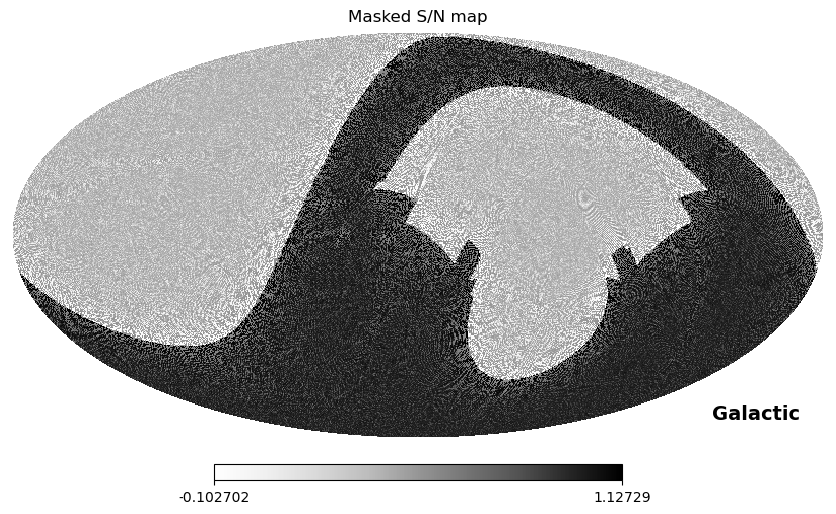

In [46]:
map_healpix = reproject.healpix_from_enmap(read_mask, lmax = 6000, nside = 512)
hp.mollview(map_healpix,norm='hist',cmap='Greys',title='Masked S/N map',cbar=True, coord = ["C", "G"])

## DES, WH22, DESI Intersections Results ##

In [21]:
# NOT Relevant code anymore

# Read in the intersections and change to redshift range
# des_wh22_AND_1.csv --> DES, WH22 Intersection, labelled with DES coordinates
# des_wh22_AND_4.csv --> DES, WH22 Intersection, labelled with WH22 coordinates
# des_wh22_desi_AND_1.csv --> DES, WH22, DESI Intersection, labelled with DES coordinates
# des_wh22_desi_AND_2.csv --> DES, WH22, DESI Intersection, labelled with DESI coordinates
# des_wh22_desi_AND_4.csv --> DES, WH22, DESI Intersection, labelled with WH22 coordinates
# KEEP IN MIND: DESI coordinates yield a smaller value with WH22 than with DES. Hence, "4" is shorter than "1" and "2"

# DES, WH22 only
dw1 = pd.read_csv("output/Locations/des_wh22_AND_1.csv", skiprows = 0)
dw1 = dw1[(dw1.z > 0.6) & (dw1.z < 1)].reset_index(drop = True)
dw2 = pd.read_csv("output/Locations/des_wh22_AND_4.csv", skiprows = 0)
dw2 = dw2[(dw2.z > 0.6) & (dw2.z < 1)].reset_index(drop = True)

# DES, DESI, and WH22
ddw1 = pd.read_csv("output/Locations/des_wh22_desi_AND_1.csv", skiprows = 0)
ddw1 = ddw1[(ddw1.z > 0.6) & (ddw1.z < 1)].reset_index(drop = True)
ddw2 = pd.read_csv("output/Locations/des_wh22_desi_AND_2.csv", skiprows = 0)
ddw2 = ddw2[(ddw2.z > 0.6) & (ddw2.z < 1)].reset_index(drop = True)

In [3]:
# Read in the graphs to compare (Cut 3 --> DESI, Cut 4 --> DES, Cut 5 --> WH22)
# Above cell not needed anymore.
# ALL with ACT

# number is axis. 1 is x, 2 is y

# DES_AND, WH22_AND, DES_XOR, WH22_XOR

intersection1 = pd.read_csv("output/Locations/Intersections/DES_WH22/Results/DES_AND/AND_cluster_validation.csv", skiprows = 0)
intersection2 = pd.read_csv("output/Locations/Intersections/DES_WH22/Results/WH22_AND/AND_cluster_validation.csv", skiprows = 0)
xorDES_1 = pd.read_csv("output/Locations/Intersections/DES_WH22/Results/DES_AND/xor1_cluster_validation.csv", skiprows = 0)
xorDES_2 = pd.read_csv("output/Locations/Intersections/DES_WH22/Results/WH22_AND/xor1_cluster_validation.csv", skiprows = 0)
xorWH22_1 = pd.read_csv("output/Locations/Intersections/DES_WH22/Results/DES_AND/xor2_cluster_validation.csv",skiprows = 0)
xorWH22_2 = pd.read_csv("output/Locations/Intersections/DES_WH22/Results/WH22_AND/xor2_cluster_validation.csv",skiprows = 0)

In [4]:
# validation1 = pd.read_csv("output/Locations/Intersections/DES_WH22/Old/DES_cluster_validation_of_WH22.csv", skiprows = 0)
# validation2 = pd.read_csv("output/Locations/Intersections/DES_WH22/Old/WH22_cluster_validation_of_WH22.csv", skiprows = 0)

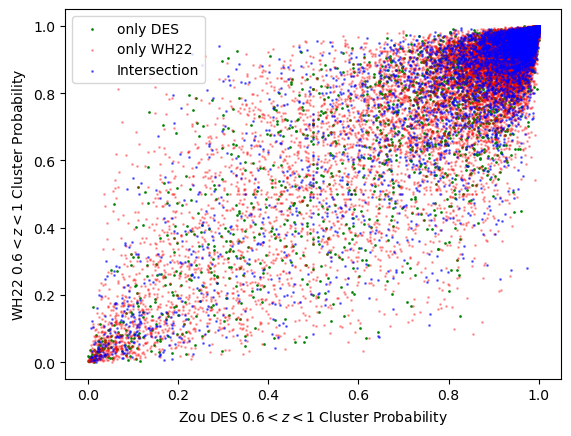

In [6]:
# Scatter Plot
# Look into if XOR is correct

plt.scatter(xorDES_1["clusterp"], xorDES_2["clusterp"], s = 1, alpha = 0.9, c = "green", label = "only DES")
plt.scatter(xorWH22_1["clusterp"], xorWH22_2["clusterp"], s = 1, alpha = 0.3, c = "red", label = "only WH22")
plt.scatter(intersection1["clusterp"], intersection2["clusterp"], s = 1, alpha = 0.5, c = "blue", label = "Intersection")

plt.xlabel("Zou DES $0.6<z<1$ Cluster Probability")
plt.ylabel("WH22 $0.6<z<1$ Cluster Probability")
plt.legend()
plt.show()

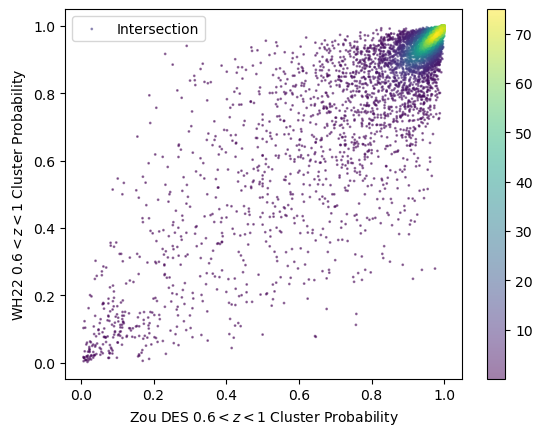

In [53]:
from scipy.stats import gaussian_kde

xy = np.vstack([intersection1["clusterp"],intersection2["clusterp"]])
z = gaussian_kde(xy)(xy)

scatter = plt.scatter(intersection1["clusterp"], intersection2["clusterp"], s = 1, alpha = 0.5, c = z, label = "Intersection")
plt.colorbar(scatter)

plt.xlabel("Zou DES $0.6<z<1$ Cluster Probability")
plt.ylabel("WH22 $0.6<z<1$ Cluster Probability")
plt.legend()
plt.show()

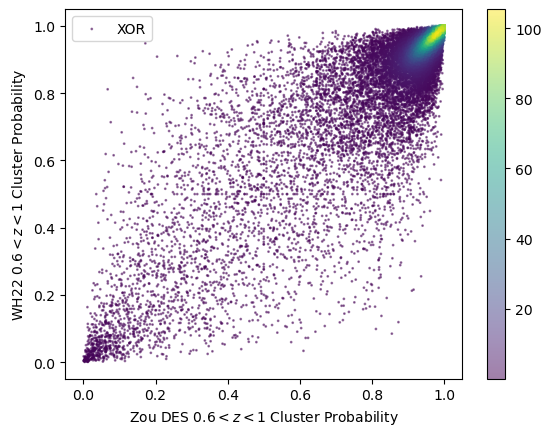

In [54]:
from scipy.stats import gaussian_kde

xor1 = pd.concat([xorDES_1["clusterp"], xorWH22_1["clusterp"]])
xor2 = pd.concat([xorDES_2["clusterp"], xorWH22_2["clusterp"]])

xy = np.vstack([xor1, xor2])
z = gaussian_kde(xy)(xy)

scatter = plt.scatter(xor1, xor2, s = 1, alpha = 0.5, c = z, label = "XOR")
plt.colorbar(scatter)

plt.xlabel("Zou DES $0.6<z<1$ Cluster Probability")
plt.ylabel("WH22 $0.6<z<1$ Cluster Probability")
plt.legend()
plt.show()

In [21]:
r1 = intersection1[(intersection1["clusterp"] > 0.9) & (intersection2["clusterp"] > 0.9)]
r1

,u3index,amf_ra,amf_dec,z,rh,cat,glat,glon,i100,i143,...,i090_r,i150_r,i220_r,iros_r,i12_r,i25_r,i60_r,i1002_r,cluster,clusterp
2,46568,23.986460,5.100006,0.895251,85.620186,1,-56.023452,143.049898,0.000005,0.000026,...,-13.935879,13.390349,-63.029025,-0.000131,1.039794,1.498154,0.544513,2.876107,1,0.905715
3,46578,26.807189,4.942984,0.802607,76.685802,1,-55.209704,147.821693,0.000043,0.000099,...,24.623178,-14.719732,196.032405,0.000243,0.976176,1.281822,0.554879,3.650450,1,0.964579
4,46587,27.913383,5.134172,0.715573,116.080368,1,-54.606344,149.459774,0.000007,0.000019,...,-56.633501,-67.417225,210.201890,0.000179,0.976207,1.169387,0.549821,3.667923,1,0.977097
7,46620,35.356838,5.058750,0.823470,132.762191,1,-51.155150,160.354464,0.000054,0.000084,...,-7.890391,18.587942,-361.301132,-0.000076,0.842506,0.945218,0.197533,2.942628,1,0.946273
10,46689,4.940975,4.641307,0.855165,115.587106,1,-57.321596,108.198694,0.000100,0.000114,...,12.560984,-66.239491,53.917847,0.000302,1.084334,1.701425,0.508992,2.436864,1,0.976885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7427,128773,74.461602,-60.559390,0.832174,61.731768,1,-37.239435,270.036557,-0.000031,-0.000023,...,-31.558948,-105.449388,-391.926644,0.000480,0.606699,1.264663,0.688401,2.015231,1,0.964069
7433,129145,345.550535,-60.991610,0.739204,231.756879,1,-51.468552,323.857120,0.000033,0.000038,...,-9.643363,117.534657,-169.488318,0.000208,0.712557,1.490914,0.477438,1.931807,1,0.963005
7434,129169,349.017427,-60.600536,0.815675,108.835987,1,-52.832225,322.106127,-0.000139,-0.000131,...,20.289568,-125.260170,-128.490803,0.000475,0.735601,1.525243,0.504517,1.851396,1,0.979485
7435,129202,355.699508,-60.709737,0.827075,141.621082,1,-54.460749,317.310589,-0.000004,0.000011,...,-1.005909,9.870929,225.187594,0.000225,0.741122,1.516201,0.458238,1.504101,1,0.995028


In [22]:
r2= intersection2[(intersection1["clusterp"] > 0.9) & (intersection2["clusterp"] > 0.9)]
r2

,u3index,amf_ra,amf_dec,z,rh,cat,glat,glon,i100,i143,...,i090_r,i150_r,i220_r,iros_r,i12_r,i25_r,i60_r,i1002_r,cluster,clusterp
2,735247,23.98204,5.08747,0.8880,43.31,4,-56.036734,143.049295,0.000005,0.000026,...,-13.688483,11.154474,-63.168899,-7.695978e-07,1.037406,1.497437,0.541773,2.873263,1,0.956641
3,739555,26.81205,4.95042,0.7218,19.00,4,-55.200993,147.824657,0.000043,0.000102,...,25.835184,-13.167457,192.420115,2.419740e-04,0.984135,1.290908,0.561010,3.663657,1,0.960124
4,741475,27.92176,5.14382,0.6445,38.78,4,-54.594167,149.466332,0.000006,0.000019,...,-58.418857,-68.041135,211.699944,1.553613e-04,0.976019,1.169780,0.547229,3.657238,1,0.959406
7,754804,35.35868,5.05670,0.8290,41.34,4,-51.155875,160.358695,0.000054,0.000085,...,-7.345802,19.172814,-365.485581,-7.947207e-05,0.843048,0.946156,0.196554,2.940095,1,0.960140
10,708235,4.95439,4.64934,0.8926,32.46,4,-57.316806,108.226187,0.000110,0.000122,...,13.490849,-65.526840,73.494936,2.652030e-04,1.083907,1.703347,0.500835,2.429866,1,0.969738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7427,805267,74.48270,-60.56868,0.7693,35.15,4,-37.227554,270.045670,-0.000032,-0.000022,...,-35.518513,-105.306485,-399.574174,4.973498e-04,0.607759,1.263846,0.687610,2.010728,1,0.970544
7433,845001,345.55054,-60.99161,0.7681,22.63,4,-51.468554,323.857117,0.000033,0.000038,...,-9.643368,117.534032,-169.490754,2.079583e-04,0.712557,1.490914,0.477438,1.931806,1,0.981983
7434,847130,349.01270,-60.60208,0.7775,24.16,4,-52.829603,322.107690,-0.000140,-0.000132,...,20.505718,-125.652801,-135.590274,4.789883e-04,0.735809,1.525010,0.504309,1.851192,1,0.912439
7435,851158,355.69995,-60.70332,0.8376,45.26,4,-54.466572,317.315245,-0.000004,0.000010,...,-1.898051,8.642446,228.999477,2.134416e-04,0.740938,1.516371,0.457918,1.503427,1,0.994134


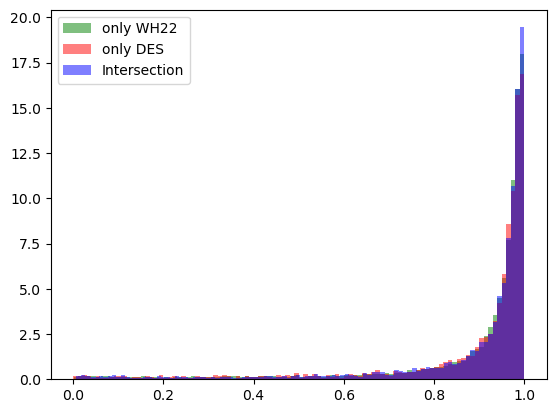

In [8]:
plt.hist(xorWH22_1["clusterp"], bins = 100, alpha = 0.5, color = "green", density = "normed", label = "only WH22")
plt.hist(xorDES_1["clusterp"], bins = 100, alpha = 0.5, color = "red", density = "normed", label = "only DES")
plt.hist(intersection1["clusterp"], bins = 100, alpha = 0.5, color = "blue", density = "normed", label = "Intersection")



plt.legend()
plt.show()

In [20]:
x = len(intersection1[intersection1["clusterp"]< .2])
y = len(xorDES_1[xorDES_1["clusterp"]< .2])
z = len(xorWH22_1[xorWH22_1["clusterp"]< .2])

print(x/len(intersection1)*100.0)
print((z+y)/(len(xorDES_1)+len(xorWH22_1)) *100.0)
# print(z/len(xorDES_1) *100.0)

2.8506118058356864
3.001968503937008


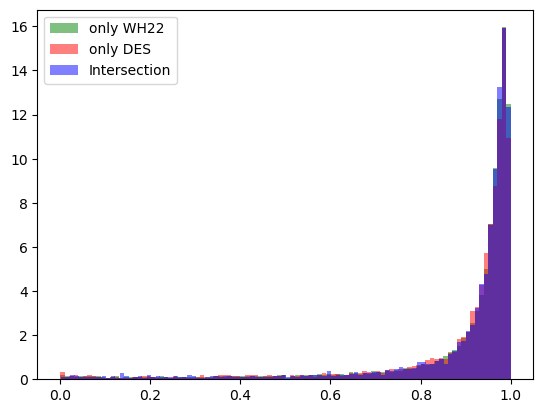

In [11]:
plt.hist(xorWH22_2["clusterp"], bins = 100, alpha = 0.5, color = "green", density = "normed", label = "only WH22")
plt.hist(xorDES_2["clusterp"], bins = 100, alpha = 0.5, color = "red", density = "normed", label = "only DES")
plt.hist(intersection2["clusterp"], bins = 100, alpha = 0.5, color = "blue", density = "normed", label = "Intersection")

plt.legend()
plt.show()

In [16]:
intersection1[(intersection1["clusterp"] > 0.96) & (intersection2["clusterp"] > 0.96)]

,u3index,amf_ra,amf_dec,z,rh,cat,glat,glon,i100,i143,...,i090_r,i150_r,i220_r,iros_r,i12_r,i25_r,i60_r,i1002_r,cluster,clusterp
3,46578,26.807189,4.942984,0.802607,76.685802,1,-55.209704,147.821693,0.000043,0.000099,...,24.623178,-14.719732,196.032405,0.000243,0.976176,1.281822,0.554879,3.650450,1,0.964579
10,46689,4.940975,4.641307,0.855165,115.587106,1,-57.321596,108.198694,0.000100,0.000114,...,12.560984,-66.239491,53.917847,0.000302,1.084334,1.701425,0.508992,2.436864,1,0.976885
16,46781,13.374336,4.681146,0.870555,91.027037,1,-58.186709,123.905378,-0.000126,-0.000093,...,-43.217783,-88.830112,-35.635910,0.000221,1.038169,1.797033,0.319394,2.462383,1,0.972437
28,46914,27.714820,4.987153,0.811807,69.739202,1,-54.819879,149.246788,0.000043,0.000079,...,-17.403414,-16.864460,181.931718,0.000242,0.986991,1.217279,0.588111,3.803574,1,0.969622
53,47211,6.995321,4.582621,0.734873,183.839288,1,-57.786640,111.917866,0.000006,0.000034,...,-2.441130,-14.078676,-132.436288,0.000267,1.007808,1.722651,0.310470,2.223393,1,0.978605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7426,128758,73.098625,-60.897355,0.928496,90.298753,1,-37.827300,270.618193,0.000056,0.000069,...,-2.936371,57.669955,-105.705477,0.000442,0.574239,1.267435,0.719592,2.173495,1,0.989903
7427,128773,74.461602,-60.559390,0.832174,61.731768,1,-37.239435,270.036557,-0.000031,-0.000023,...,-31.558948,-105.449388,-391.926644,0.000480,0.606699,1.264663,0.688401,2.015231,1,0.964069
7433,129145,345.550535,-60.991610,0.739204,231.756879,1,-51.468552,323.857120,0.000033,0.000038,...,-9.643363,117.534657,-169.488318,0.000208,0.712557,1.490914,0.477438,1.931807,1,0.963005
7435,129202,355.699508,-60.709737,0.827075,141.621082,1,-54.460749,317.310589,-0.000004,0.000011,...,-1.005909,9.870929,225.187594,0.000225,0.741122,1.516201,0.458238,1.504101,1,0.995028


## July First Attempt - Running on entire DES, WH22 ##

In [ ]:
# Note the problem with this method: Equal amount of intersection is trained with both DES, WH22, while WH22
# is a LOT bigger as a catalog than DES. A smaller proportion of the trained set is intersection in WH22 vs. DES. 

# Try also:
# 1. making both same training size (make WH22 training set smaller)
# 2. Method discussed in meeting, where training is done at random and results are picked out from validation that happen
# to be in the intersection (for each, and both) 

# The second method (better) is trying to answer a different question: Are clusters in the intersection predicted with higher
# probability (distribution) compared to those that aren't?

In [107]:
# To run intersection, don't run above. Just load in intersect1, intersect4, and xor1, xor4 files HERE.

# <!--------------------------------!>

# locs --> just locations, without restricting to ACT region
# intersect --> locations and signals for the intersections, restricted to ACT region
# xor --> items in that catalogue NOT in the intersection, with signals

# des_wh22_AND_1_act, des_wh22_AND_1_Nact

locs1 = pd.read_csv("output/Locations/Intersections/DES_WH22/des_wh22_AND_1.csv", skiprows = 0)
locs4 = pd.read_csv("output/Locations/Intersections/DES_WH22/des_wh22_AND_4.csv", skiprows = 0)
intersect1 = pd.read_csv("output/Locations/Intersections/DES_WH22/des_wh22_AND_1_act.csv", skiprows = 0)
intersect4 = pd.read_csv("output/Locations/Intersections/DES_WH22/des_wh22_AND_4_act.csv", skiprows = 0)
xor1 = pd.read_csv("output/Locations/Intersections/DES_WH22/des_xor_act.csv", skiprows = 0)
xor4 = pd.read_csv("output/Locations/Intersections/DES_WH22/wh22_xor_act.csv", skiprows = 0)

### Half and Half ###

In [2]:
# Read in reuslts of newest method
# half_and_half --> concatenate intersection and xor. Train on half of both 
# let_chance_decide --> train random half of each set. Then identify the intersection values being validate and compare
# their values to non intersection ones.

# WH22_full_cluster_validation, WH22_restricted_cluster_validation

des_valid = pd.read_csv("output/Locations/Intersections/DES_WH22/Results_allset/half_and_half/DES_cluster_validation.csv", skiprows = 0)
wh22_valid = pd.read_csv("output/Locations/Intersections/DES_WH22/Results_allset/half_and_half/WH22_restricted_cluster_validation.csv", skiprows = 0)
wh22_valid

,u3index,amf_ra,amf_dec,z,rh,cat,glat,glon,i100,i143,...,i090_r,i150_r,i220_r,iros_r,i12_r,i25_r,i60_r,i1002_r,cluster,clusterp
0,789537,59.74826,-17.10779,0.7134,26.22,4,-45.680677,209.975817,0.000037,4.305490e-05,...,25.033228,124.826561,-164.279979,0.000735,0.899559,1.712637,0.657346,2.253631,1,0.639266
1,710567,6.87653,-35.05690,0.9061,25.45,4,-80.565031,334.297015,-0.000033,-4.261486e-05,...,38.419315,-22.083627,-117.373581,0.000145,1.004856,1.871764,0.499228,1.410929,1,0.965040
2,754322,35.06610,3.00059,0.7647,33.44,4,-53.032447,161.806966,0.000002,1.505448e-05,...,-65.770044,-63.924492,391.978127,0.000468,1.028789,1.346617,0.476013,3.346972,1,0.988950
3,752791,34.21933,-15.13566,0.6776,26.83,4,-66.804019,186.138395,-0.000017,-2.886341e-08,...,-59.857073,27.546143,12.664386,0.000278,1.039559,2.033778,0.658787,2.137367,1,0.944604
4,719136,13.23101,-25.41128,0.7522,21.65,4,-88.251007,133.995771,0.000053,6.075040e-05,...,-1.858994,9.823923,-53.775060,0.000098,1.093932,2.080205,0.598534,1.876760,1,0.438244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12536,836814,331.45416,-60.86834,0.8556,20.75,4,-46.325260,330.722814,0.000086,1.032694e-04,...,-7.256212,18.688543,250.634727,0.000350,0.785620,1.517942,0.645423,2.761233,1,0.978977
12537,845001,345.55054,-60.99161,0.7681,22.63,4,-51.468554,323.857117,0.000033,3.831233e-05,...,-9.643368,117.534032,-169.490754,0.000208,0.712557,1.490914,0.477438,1.931806,1,0.927259
12538,847130,349.01270,-60.60208,0.7775,24.16,4,-52.829603,322.107690,-0.000140,-1.319966e-04,...,20.505718,-125.652801,-135.590274,0.000479,0.735809,1.525010,0.504309,1.851192,1,0.905443
12539,851158,355.69995,-60.70332,0.8376,45.26,4,-54.466572,317.315245,-0.000004,1.021572e-05,...,-1.898051,8.642446,228.999477,0.000213,0.740938,1.516371,0.457918,1.503427,1,0.980341


In [13]:
in_intersection = des_valid["u3index"].isin(intersect1["u3index"])
in_xor = des_valid["u3index"].isin(xor1["u3index"])

des_AND = des_valid[in_intersection]
des_XOR = des_valid[in_xor]

len(des_AND) + len(des_XOR)

In [24]:
in_intersection = wh22_valid["u3index"].isin(intersect4["u3index"])
in_xor = wh22_valid["u3index"].isin(xor4["u3index"])

wh22_AND = wh22_valid[in_intersection]
wh22_XOR = wh22_valid[in_xor]

len(wh22_AND) + len(wh22_XOR)

12541

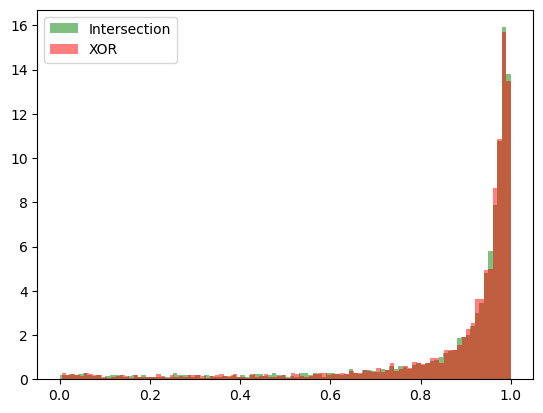

In [25]:
# des_AND, des_XOR, wh22_AND, wh22_XOR

plt.hist(wh22_AND["clusterp"], bins = 100, alpha = 0.5, color = "green", density = "normed", label = "Intersection")
plt.hist(wh22_XOR["clusterp"], bins = 100, alpha = 0.5, color = "red", density = "normed", label = "XOR")

plt.legend()
plt.show()

### Let Chance Decide ###

In [108]:
# Run without ACT and see if the results change!

# DES_cluster_validation, DES_cluster_validation_Nact
# Use locs1 instead of intersect1 for no ACT

des_valid = pd.read_csv("output/Locations/Intersections/DES_WH22/Results_allset/let_chance_decide/DES_cluster_validation_act.csv", skiprows = 0)
wh22_valid = pd.read_csv("output/Locations/Intersections/DES_WH22/Results_allset/let_chance_decide/WH22_cluster_validation_act.csv", skiprows = 0)
wh22_valid

,amf_ra,amf_dec,z,rh,cat,u3index,glat,glon,i100,i143,...,i090_r,i150_r,i220_r,iros_r,i12_r,i25_r,i60_r,i1002_r,cluster,clusterp
0,71.65275,-22.53689,0.7427,49.51,4,802223,-36.918684,221.774506,-6.217349e-05,-0.000034,...,-56.690017,16.748707,103.585211,0.000170,0.808260,1.559053,0.779768,3.064944,1,0.934763
1,350.10568,-49.97493,0.8590,46.94,4,847800,-61.282867,334.109248,1.139766e-04,0.000114,...,-6.394490,37.222889,-279.208343,0.000197,0.834401,1.680297,0.479844,1.460549,1,0.987842
2,76.46544,-18.45940,0.8458,21.17,4,807172,-31.309459,218.946656,2.395299e-05,0.000052,...,74.942010,11.234196,-82.699739,0.000490,0.832070,1.538933,0.821946,3.351760,1,0.672284
3,359.89008,0.21863,0.9403,25.28,4,853947,-59.944227,96.309909,3.746449e-05,0.000046,...,-50.541928,-23.232120,-93.616183,0.000035,1.233836,1.983504,0.465297,2.806138,1,0.924456
4,333.38498,0.96171,0.6832,26.99,4,837861,-42.784163,62.923518,-2.252142e-05,0.000014,...,18.984540,0.142148,-26.630728,0.000283,1.408398,2.244797,0.749880,2.832888,1,0.149586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32808,38.18428,3.92502,0.9666,53.87,4,759637,-50.476044,165.042344,-1.528742e-06,-0.000001,...,1.663850,29.703751,31.722459,0.000421,0.940018,1.384846,0.461908,3.006282,1,0.960392
32809,315.20883,-43.79355,0.7615,41.10,4,827782,-41.247971,357.132025,-3.086367e-07,0.000011,...,25.048371,-110.293857,187.205500,0.000834,1.019199,1.885793,0.675078,2.790231,1,0.960637
32810,337.84070,-59.50000,0.7709,21.92,4,840520,-49.713218,329.702608,8.925954e-05,0.000092,...,-53.508728,30.360200,244.715205,0.000322,0.734286,1.504935,0.477340,1.797575,1,0.986204
32811,80.26972,-23.14845,0.7495,22.73,4,810910,-29.577546,225.470882,-1.225177e-04,-0.000115,...,-80.404623,-13.413830,-318.605690,0.000245,0.748723,1.453894,0.622262,2.107406,1,0.996530


In [109]:
des_AND = intersect1[intersect1["u3index"].isin(des_valid["u3index"])]
des_XOR = xor1[xor1["u3index"].isin(des_valid["u3index"])]

wh22_AND = intersect4[intersect4["u3index"].isin(wh22_valid["u3index"])]
wh22_XOR = xor4[xor4["u3index"].isin(wh22_valid["u3index"])]

print(len(des_AND) + len(des_XOR), len(wh22_AND) + len(wh22_XOR))

12541 32813


In [120]:
# chosen_wh22 = intersect4.loc[intersect4["u3index"].isin(wh22_AND["u3index"])]
# chosen_des = intersect1.loc[intersect1["u3index"].isin(des_AND["u3index"])]
des_AND

,amf_ra,amf_dec,z,rh,cat,u3index
0,2.728994,4.852877,0.833884,118.069723,1,46489
1,4.327177,5.021294,0.831561,87.429972,1,46492
5,23.986460,5.100006,0.895251,85.620186,1,46568
7,26.807189,4.942984,0.802607,76.685802,1,46578
10,30.937285,5.311313,0.937270,74.284970,1,46600
...,...,...,...,...,...,...
15644,59.273860,-66.415007,0.755883,243.069950,1,133406
15645,62.918055,-65.790095,0.675214,166.303226,1,133413
15647,50.486371,-66.608892,0.689917,114.049078,1,133419
15648,54.450779,-67.175674,0.755606,177.119563,1,133424


In [110]:
wh22_intersection = wh22_AND[wh22_AND.index.isin(des_AND.index)].copy()
des_intersection = des_AND[des_AND.index.isin(wh22_AND.index)].copy()
wh22_intersection

,u3index,amf_ra,amf_dec,z,rh,cat,glat,glon,i100,i143,...,i857_r,i090_r,i150_r,i220_r,iros_r,i12_r,i25_r,i60_r,i1002_r,cluster
0,705670,2.71738,4.84389,0.8476,43.74,4,-56.558447,104.366246,0.000019,4.617409e-05,...,0.001586,14.555180,-31.035848,138.678928,3.582402e-05,1.219132,1.883563,0.698685,2.853945,1
4,730234,20.68896,5.26780,0.7554,31.02,4,-56.730897,137.248444,0.000003,9.664609e-07,...,-0.018671,31.060450,8.902995,84.230719,1.751830e-04,1.262036,2.295195,1.035823,3.316676,1
5,735247,23.98204,5.08747,0.8880,43.31,4,-56.036734,143.049295,0.000005,2.596918e-05,...,0.013171,-13.688483,11.154474,-63.168899,-7.695978e-07,1.037406,1.497437,0.541773,2.873263,1
10,746742,30.92551,5.31648,0.8735,26.64,4,-53.151255,153.921679,0.000061,9.361873e-05,...,-0.020964,50.135548,14.411705,72.315003,-1.070644e-04,0.914548,1.047439,0.401749,3.247563,1
11,749869,32.62975,5.21021,0.7123,39.95,4,-52.434847,156.472109,0.000176,1.843999e-04,...,-0.043824,54.728850,10.590172,2.220623,6.819514e-04,0.906739,1.076930,0.373543,3.376783,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14854,805197,74.42508,-60.90989,0.7049,38.88,4,-37.192482,270.473293,0.000023,4.213212e-05,...,-0.004697,-13.426689,21.849682,-40.801899,3.160261e-04,0.621158,1.259907,0.677493,1.998300,1
14867,845001,345.55054,-60.99161,0.7681,22.63,4,-51.468554,323.857117,0.000033,3.831233e-05,...,0.007218,-9.643368,117.534032,-169.490754,2.079583e-04,0.712557,1.490914,0.477438,1.931806,1
14868,846176,347.52078,-61.02107,0.8505,46.75,4,-52.054792,322.638169,-0.000090,-7.562380e-05,...,0.001207,-3.415262,-59.681698,-70.054823,3.802256e-05,0.733370,1.510607,0.457554,1.792839,1
14869,847130,349.01270,-60.60208,0.7775,24.16,4,-52.829603,322.107690,-0.000140,-1.319966e-04,...,-0.005651,20.505718,-125.652801,-135.590274,4.789883e-04,0.735809,1.525010,0.504309,1.851192,1


In [111]:
indexed_wh22 = wh22_valid.set_index("u3index")
indexed_des = des_valid.set_index("u3index")

wh22_probs = indexed_wh22.loc[wh22_intersection.u3index.values, :]["clusterp"]
des_probs = indexed_des.loc[des_intersection.u3index.values, :]["clusterp"]

wh22_intersection["clusterp"] = wh22_probs.values
des_intersection["clusterp"] = des_probs.values

des_intersection

,u3index,amf_ra,amf_dec,z,rh,cat,glat,glon,i100,i143,...,i090_r,i150_r,i220_r,iros_r,i12_r,i25_r,i60_r,i1002_r,cluster,clusterp
0,46489,2.728994,4.852877,0.833884,118.069723,1,-56.553120,104.391013,0.000019,0.000047,...,10.927121,-32.677938,136.550929,0.000044,1.220029,1.882325,0.696761,2.849328,1,0.330965
4,46550,20.700431,5.257738,0.751069,146.615125,1,-56.738183,137.272810,0.000008,0.000007,...,35.419601,8.940365,84.826995,0.000164,1.263153,2.297106,1.037572,3.318709,1,0.173665
5,46568,23.986460,5.100006,0.895251,85.620186,1,-56.023452,143.049898,0.000005,0.000026,...,-13.935879,13.390349,-63.029025,-0.000131,1.039794,1.498154,0.544513,2.876107,1,0.874703
10,46600,30.937285,5.311313,0.937270,74.284970,1,-53.150444,153.943001,0.000061,0.000093,...,53.597480,19.217192,78.913417,-0.000097,0.916709,1.047602,0.401574,3.252939,1,0.673455
11,46609,32.620019,5.216841,0.691299,179.348543,1,-52.433864,156.452916,0.000181,0.000184,...,55.373295,12.521855,13.273481,0.000715,0.907193,1.072416,0.385515,3.397401,1,0.822503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14854,128772,74.423574,-60.910558,0.749676,119.865004,1,-37.193077,270.474289,0.000023,0.000042,...,-13.296009,22.252496,-39.819652,0.000317,0.620997,1.259922,0.677449,1.998492,1,0.978826
14867,129145,345.550535,-60.991610,0.739204,231.756879,1,-51.468552,323.857120,0.000033,0.000038,...,-9.643363,117.534657,-169.488318,0.000208,0.712557,1.490914,0.477438,1.931807,1,0.959029
14868,129161,347.542207,-61.019499,0.852150,122.868121,1,-52.062454,322.626493,-0.000089,-0.000076,...,-3.653901,-56.714028,-64.067675,0.000006,0.732963,1.511471,0.457483,1.792307,1,0.941316
14869,129169,349.017427,-60.600536,0.815675,108.835987,1,-52.832225,322.106127,-0.000139,-0.000131,...,20.289568,-125.260170,-128.490803,0.000475,0.735601,1.525243,0.504517,1.851396,1,0.970901


In [131]:
wh22_intersection

,amf_ra,amf_dec,z,rh,cat,u3index,clusterp
1,4.32032,5.02819,0.7620,26.98,4,707510,0.773535
7,26.81205,4.95042,0.7218,19.00,4,739555,0.867144
15,35.35868,5.05670,0.8290,41.34,4,754804,0.865426
17,38.00245,5.16872,0.6279,28.02,4,759339,0.766594
26,8.88254,4.43340,0.6394,18.50,4,713226,0.961172
...,...,...,...,...,...,...,...
15642,59.66353,-66.46175,0.7622,43.49,4,789429,0.922061
15643,59.62865,-66.27515,0.7234,39.46,4,789389,0.974871
15644,59.26735,-66.41239,0.7050,66.26,4,788990,0.967719
15647,50.50767,-66.59171,0.7080,49.96,4,778092,0.898387


In [112]:
# If we want to find differences in the intersection

differences = (des_intersection - wh22_intersection).abs()
differences["cat"] = "N/A"
differences["u3index"] = "N/A"
differences["u3index_des"] = des_intersection.u3index.values
differences["u3index_wh22"] = wh22_intersection.u3index.values
differences["cluster"] = "N/A"
differences["Index"] = differences.index
differences

,u3index,amf_ra,amf_dec,z,rh,cat,glat,glon,i100,i143,...,iros_r,i12_r,i25_r,i60_r,i1002_r,cluster,clusterp,u3index_des,u3index_wh22,Index
0,N/A,0.011614,0.008987,0.013716,74.329723,N/A,0.005328,0.024766,1.946694e-07,6.652945e-07,...,8.327946e-06,8.962061e-04,1.238767e-03,1.924508e-03,4.616217e-03,N/A,0.070507,46489,705670,0
4,N/A,0.011471,0.010062,0.004331,115.595125,N/A,0.007286,0.024366,5.249733e-06,5.659485e-06,...,1.085151e-05,1.117236e-03,1.911254e-03,1.749104e-03,2.032666e-03,N/A,0.093739,46550,730234,4
5,N/A,0.004420,0.012536,0.007251,42.310186,N/A,0.013282,0.000603,6.718787e-07,3.587992e-07,...,1.299490e-04,2.387945e-03,7.168550e-04,2.739610e-03,2.844075e-03,N/A,0.106871,46568,735247,5
10,N/A,0.011775,0.005167,0.063770,47.644970,N/A,0.000811,0.021322,8.072428e-09,3.644633e-07,...,9.736374e-06,2.161104e-03,1.625566e-04,1.754764e-04,5.376604e-03,N/A,0.156814,46600,746742,10
11,N/A,0.009731,0.006631,0.021001,139.398543,N/A,0.000983,0.019192,5.273821e-06,7.045644e-07,...,3.260046e-05,4.540422e-04,4.514525e-03,1.197197e-02,2.061854e-02,N/A,0.144565,46609,749869,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14854,N/A,0.001506,0.000668,0.044776,80.985004,N/A,0.000595,0.000995,1.858639e-07,1.672676e-07,...,1.401283e-06,1.610748e-04,1.490111e-05,4.395563e-05,1.919194e-04,N/A,0.003506,128772,805197,14854
14867,N/A,0.000005,0.000000,0.028896,209.126879,N/A,0.000002,0.000003,1.048430e-09,9.016239e-10,...,8.618421e-09,8.272468e-08,1.304757e-08,1.341211e-07,1.826994e-07,N/A,0.005806,129145,845001,14867
14868,N/A,0.021427,0.001571,0.001650,76.118121,N/A,0.007662,0.011676,6.759724e-07,7.085155e-07,...,3.228617e-05,4.072040e-04,8.641784e-04,7.153722e-05,5.313166e-04,N/A,0.234654,129161,846176,14868
14869,N/A,0.004727,0.001544,0.038175,84.675987,N/A,0.002622,0.001564,1.053042e-06,7.809259e-07,...,3.601227e-06,2.076895e-04,2.338908e-04,2.082752e-04,2.037117e-04,N/A,0.014703,129169,847130,14869


In [161]:
# differences.to_csv("output/Locations/Intersections/DES_WH22/difference_table_Nact.csv", index = False)

In [30]:
differences = pd.read_csv("output/Locations/Intersections/DES_WH22/difference_table_Nact.csv", skiprows = 0)

In [51]:
# Make cuts, if desired

# Direct cut

# des_cut = des_intersection[des_intersection.z > 0.8]
# wh22_cut = wh22_intersection[wh22_intersection.z > 0.8]

# Difference Table
difference_indices = differences[np.sqrt((differences.amf_ra**2) + differences.amf_dec**2) < 0.005].Index
des_cut = des_intersection.loc[difference_indices]
wh22_cut = wh22_intersection.loc[difference_indices]

print("DES length:", len(des_cut), "WH22 length", len(wh22_cut))

DES length: 713 WH22 length 713


In [58]:
# Adjustments as needed (both usually)

# WH22 is longer
wh22_cut = wh22_cut[wh22_cut.index.isin(des_cut.index)]

# DES is longer
des_cut = des_cut[des_cut.index.isin(wh22_cut.index)]

print("DES length:", len(des_cut), "WH22 length", len(wh22_cut))

DES length: 2999 WH22 length 2999


In [117]:
wh22_cut

,u3index,amf_ra,amf_dec,z,rh,cat,glat,glon,i100,i143,...,i090_r,i150_r,i220_r,iros_r,i12_r,i25_r,i60_r,i1002_r,cluster,clusterp
0,705670,2.71738,4.84389,0.8476,43.74,4,-56.558447,104.366246,0.000019,4.617409e-05,...,14.555180,-31.035848,138.678928,0.000036,1.219132,1.883563,0.698685,2.853945,1,0.260458
4,730234,20.68896,5.26780,0.7554,31.02,4,-56.730897,137.248444,0.000003,9.664609e-07,...,31.060450,8.902995,84.230719,0.000175,1.262036,2.295195,1.035823,3.316676,1,0.267405
18,703892,1.06237,4.59764,0.6549,49.49,4,-56.287749,101.390600,0.000016,2.905730e-05,...,-79.502956,-136.820878,-73.646522,0.000386,1.233992,1.896969,0.652979,2.609989,1,0.743859
26,713226,8.88254,4.43340,0.6394,18.50,4,-58.205232,115.390680,0.000006,4.446375e-05,...,-16.909309,-66.121732,140.350273,0.000226,1.032909,1.918506,0.469506,2.440148,1,0.981962
30,715451,10.49842,4.24783,0.7539,20.29,4,-58.541099,118.416878,0.000115,1.192641e-04,...,30.057159,9.046398,-119.225879,0.000226,1.074115,2.002801,0.481814,2.478157,1,0.935156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14849,777598,50.08616,-60.93688,0.6286,24.73,4,-47.971534,276.894916,0.000105,1.105409e-04,...,-4.227086,32.141443,5.440781,0.000412,0.608337,1.332966,0.716476,2.325822,1,0.910128
14854,805197,74.42508,-60.90989,0.7049,38.88,4,-37.192482,270.473293,0.000023,4.213212e-05,...,-13.426689,21.849682,-40.801899,0.000316,0.621158,1.259907,0.677493,1.998300,1,0.982332
14867,845001,345.55054,-60.99161,0.7681,22.63,4,-51.468554,323.857117,0.000033,3.831233e-05,...,-9.643368,117.534032,-169.490754,0.000208,0.712557,1.490914,0.477438,1.931806,1,0.953223
14869,847130,349.01270,-60.60208,0.7775,24.16,4,-52.829603,322.107690,-0.000140,-1.319966e-04,...,20.505718,-125.652801,-135.590274,0.000479,0.735809,1.525010,0.504309,1.851192,1,0.985604


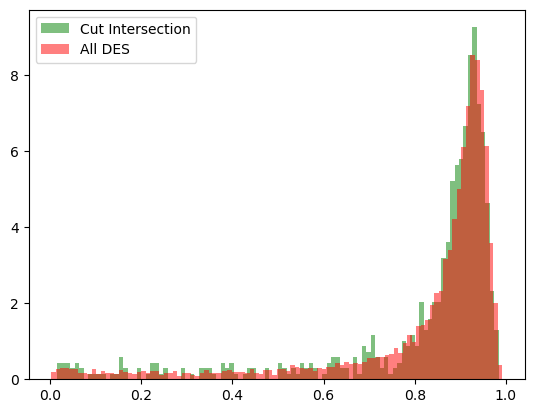

In [52]:
# des_XOR, des_valid, des_intersection, wh22_XOR, wh22_intersection, wh22_valid

# plt.hist(des_intersection["clusterp"], bins = 100, alpha = 0.5, color = "blue", density = "normed", label = "Intersection")
plt.hist(des_cut["clusterp"], bins = 100, alpha = 0.5, color = "green", density = "normed", label = "Cut Intersection")

plt.hist(des_valid["clusterp"], bins = 100, alpha = 0.5, color = "red", density = "normed", label = "All DES")

plt.legend()
plt.show()

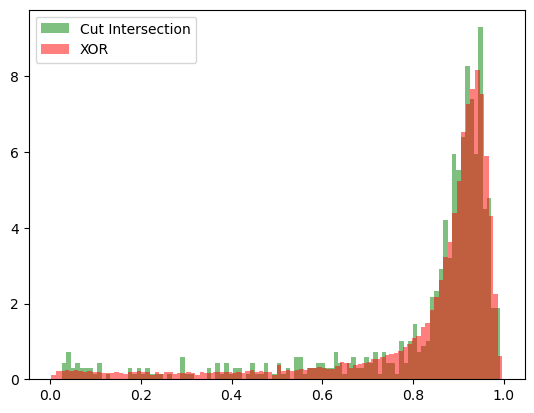

In [53]:
# des_XOR, des_valid, des_intersection, wh22_XOR, wh22_intersection, wh22_valid

# plt.hist(wh22_intersection["clusterp"], bins = 100, alpha = 0.5, color = "blue", density = "normed", label = "Intersection")
plt.hist(wh22_cut["clusterp"], bins = 100, alpha = 0.5, color = "green", density = "normed", label = "Cut Intersection")

plt.hist(wh22_valid["clusterp"], bins = 100, alpha = 0.5, color = "red", density = "normed", label = "XOR")

plt.legend()
plt.show()

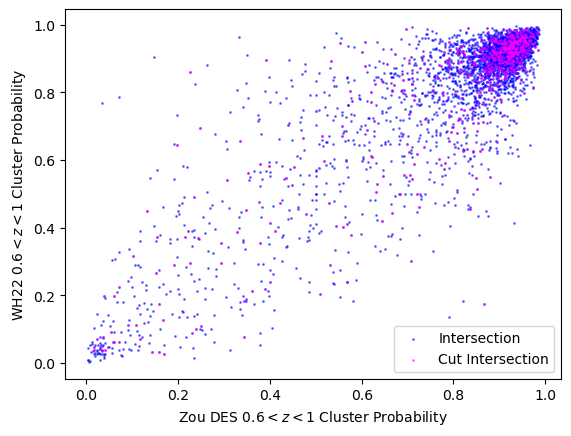

In [54]:
# Graphing the intersection

plt.scatter(des_intersection["clusterp"], wh22_intersection["clusterp"], s = 1, alpha = 0.5, c = "blue", label = "Intersection")
plt.scatter(des_cut["clusterp"], wh22_cut["clusterp"], s = 1, alpha = 0.5, c = "magenta", label = "Cut Intersection")


plt.xlabel("Zou DES $0.6<z<1$ Cluster Probability")
plt.ylabel("WH22 $0.6<z<1$ Cluster Probability")
plt.legend()
plt.show()

## Some Random Attempts to Find a Pattern ##

In [ ]:
# Reference R^2

# NO ACT
# All intersection: 0.7562200020109681 (100%)

# Differences: tells us something about how slight difference in location, signal etc. could effect the results
# Less than 1 arcmin Difference in ra, dec: 0.762532901567426 (68.47%)
# Richness Difference less than 50: 0.7762192427473299 (5.11%)

# Richness
# DES Richness higher than 300: 0.8291965215817667 (3.08%)
# DES Richness lower than 100: 0.7621518040326893 (17.40%)
# WH22 Richness is higher than 60: 0.8273284537860129 (4.22%)
# WH22 Richness is lower than 50: 0.7561237665365286 (84.32%)


# With ACT
# All intersection: 0.6803503693315964 (100%)

# ACT Signal Differences
# DES Outliers: 0.6701146671052123 (19.75%)
# WH22 Outliers: 0.6744798382452177 (19.40%)
# DES No outliers: 0.682380791025971 (80.25%)
# WH22 No outliers: 0.6810950124073145 (80.60%)

# Differences
# Less than 1 arcmin Difference in ra, dec: 0.6776515355481931 (68.8%)


Percent of Intersection in Constraint: 68.7985014717688
R^2: 0.6776515355481931


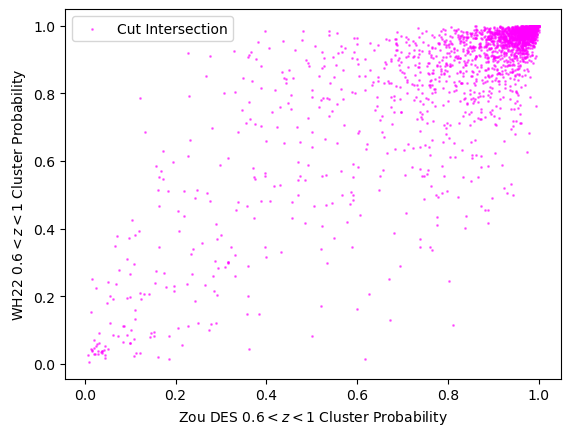

,u3index,amf_ra,amf_dec,z,rh,cat,glat,glon,i100,i143,...,iros_r,i12_r,i25_r,i60_r,i1002_r,cluster,clusterp,u3index_des,u3index_wh22,Index
0,N/A,0.011614,0.008987,0.013716,74.329723,N/A,0.005328,0.024766,1.946694e-07,6.652945e-07,...,8.327946e-06,8.962061e-04,1.238767e-03,1.924508e-03,4.616217e-03,N/A,0.070507,46489,705670,0
4,N/A,0.011471,0.010062,0.004331,115.595125,N/A,0.007286,0.024366,5.249733e-06,5.659485e-06,...,1.085151e-05,1.117236e-03,1.911254e-03,1.749104e-03,2.032666e-03,N/A,0.093739,46550,730234,4
5,N/A,0.004420,0.012536,0.007251,42.310186,N/A,0.013282,0.000603,6.718787e-07,3.587992e-07,...,1.299490e-04,2.387945e-03,7.168550e-04,2.739610e-03,2.844075e-03,N/A,0.106871,46568,735247,5
10,N/A,0.011775,0.005167,0.063770,47.644970,N/A,0.000811,0.021322,8.072428e-09,3.644633e-07,...,9.736374e-06,2.161104e-03,1.625566e-04,1.754764e-04,5.376604e-03,N/A,0.156814,46600,746742,10
11,N/A,0.009731,0.006631,0.021001,139.398543,N/A,0.000983,0.019192,5.273821e-06,7.045644e-07,...,3.260046e-05,4.540422e-04,4.514525e-03,1.197197e-02,2.061854e-02,N/A,0.144565,46609,749869,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,N/A,0.007267,0.005873,0.008193,189.562240,N/A,0.002004,0.010517,1.373979e-06,1.841705e-06,...,1.592522e-05,7.397855e-04,3.423011e-04,2.070668e-04,1.176739e-03,N/A,0.034496,128578,764201,14845
14854,N/A,0.001506,0.000668,0.044776,80.985004,N/A,0.000595,0.000995,1.858639e-07,1.672676e-07,...,1.401283e-06,1.610748e-04,1.490111e-05,4.395563e-05,1.919194e-04,N/A,0.003506,128772,805197,14854
14867,N/A,0.000005,0.000000,0.028896,209.126879,N/A,0.000002,0.000003,1.048430e-09,9.016239e-10,...,8.618421e-09,8.272468e-08,1.304757e-08,1.341211e-07,1.826994e-07,N/A,0.005806,129145,845001,14867
14869,N/A,0.004727,0.001544,0.038175,84.675987,N/A,0.002622,0.001564,1.053042e-06,7.809259e-07,...,3.601227e-06,2.076895e-04,2.338908e-04,2.082752e-04,2.037117e-04,N/A,0.014703,129169,847130,14869


In [152]:
# Constraint

# constraint = differences
constraint = differences[(np.sqrt((differences.amf_ra**2) + differences.amf_dec**2) < 0.0166666)]
# constraint = differences[differences.rh > 200]
# constraint = des_intersection[wh22_intersection.rh > 70]
# constraint = outliers.copy()
difference_indices = constraint.index
des_cut = des_intersection.loc[difference_indices]
wh22_cut = wh22_intersection.loc[difference_indices]

# Percent 
print("Percent of Intersection in Constraint:", len(constraint)/len(differences) * 100)

# R^2 value, for quick reference
from sklearn.metrics import r2_score
print ("R^2:", r2_score(des_cut["clusterp"], wh22_cut["clusterp"]))

# Graph
plt.scatter(des_cut["clusterp"], wh22_cut["clusterp"], s = 1, alpha = 0.5, c = "magenta", label = "Cut Intersection")

plt.xlabel("Zou DES $0.6<z<1$ Cluster Probability")
plt.ylabel("WH22 $0.6<z<1$ Cluster Probability")
plt.legend()
plt.show()

constraint

/home/dchanda2002/anaconda3/lib/python3.10/site-packages/healpy/projaxes.py:377: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  s = self.scatter(x, y, *args, **kwds)


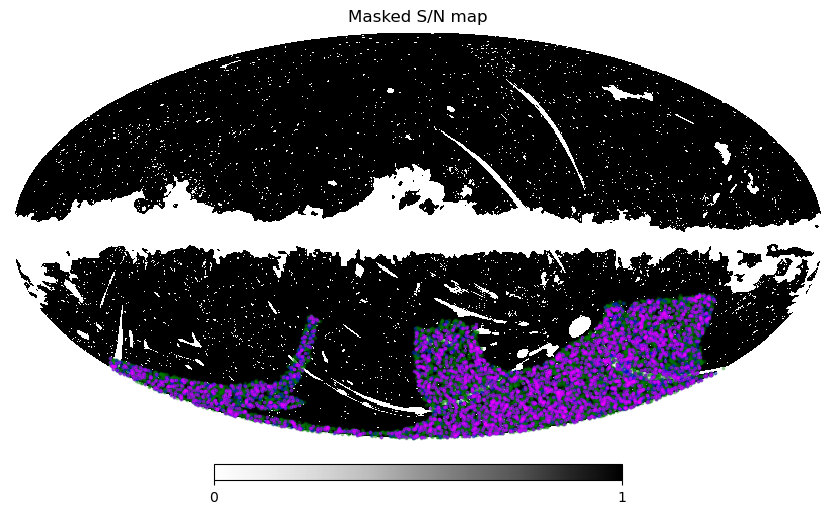

In [166]:
# data/rass_healpix_countsec.fits
# data/mask_comprass.fits

import healpy as hp
import pixell
pl143 = hp.read_map('data/mask_comprass.fits')
hp.mollview(pl143,norm='hist',cmap='Greys',title='Masked S/N map',cbar=True) # coord = ["C", "G"]
#hp.visufunc.projscatter(glon,glat,lonlat=True)#,c=countfs,s=10,vmin=0, vmax=1)
# hp.visufunc.projscatter(temp['glon'],temp['glat'],lonlat=True,c="blue",s=3,vmin=0, vmax=1)
hp.visufunc.projscatter(des_valid['glon'],des_valid['glat'],lonlat=True,c="green",s=3,vmin=0, vmax=1, alpha = 0.3)
hp.visufunc.projscatter(des_intersection['glon'],des_intersection['glat'],lonlat=True,c="blue",s=3,vmin=0, vmax=1, alpha = 0.3)
hp.visufunc.projscatter(des_cut['glon'],des_cut['glat'],lonlat=True,c="magenta",s=3,vmin=0, vmax=1, alpha = 0.3)

In [179]:
from sklearn.metrics import r2_score
print (r2_score(des_intersection["clusterp"], wh22_intersection["clusterp"]))

0.6803503693315964


In [ ]:
# 80% of Validations have < 10% difference in cluster predictions

In [140]:
means = [differences.i090.mean(), differences.i150.mean(), differences.i220.mean(), \
         differences.i090_r.mean(), differences.i150_r.mean(), differences.i220_r.mean()]
stddev = [differences.i090.std(), differences.i150.std(), differences.i220.std(), \
         differences.i090_r.std(), differences.i150_r.std(), differences.i220_r.std()]
stddev

[5.727180865074078,
 6.399360773176411,
 19.716950088463353,
 3.4156270972744984,
 3.794355733107268,
 12.617922512068125]

In [141]:
outlier_range = [1.5*i for i in stddev]
max_diff = [means[i] + outlier_range[i] for i in range(len(means))]
min_diff = [means[i] - outlier_range[i] for i in range(len(means))]

In [134]:
# Alternatively
data = differences.copy()

quartiles_090 = data.i090.quantile([0.25, 0.75])
quartiles_150 = data.i150.quantile([0.25, 0.75])
quartiles_220 = data.i220.quantile([0.25, 0.75])
quartiles_090_r = data.i090_r.quantile([0.25, 0.75])
quartiles_150_r = data.i150_r.quantile([0.25, 0.75])
quartiles_220_r = data.i220_r.quantile([0.25, 0.75])

all_quartiles = [quartiles_090, quartiles_150, quartiles_220, quartiles_090_r, quartiles_150_r, quartiles_220_r]

IQR = [item[0.75] - item[0.25] for item in all_quartiles]
max_diff = [all_quartiles[i][0.75] + IQR[i] for i in range(len(IQR))]
min_diff = [all_quartiles[i][0.25] - IQR[i] for i in range(len(IQR))]

In [135]:
min_diff

[-3.4401129291995147,
 -3.8265394180179886,
 -11.7153834808731,
 -1.969968164162566,
 -2.3405139407173365,
 -7.3007062313986495]

In [144]:
f90 = (data.i090 > max_diff[0]) | (data.i090 < min_diff[0])
f150 = (data.i150 > max_diff[1]) | (data.i150 < min_diff[1])
f220 = (data.i220 > max_diff[2]) | (data.i220 < min_diff[2])
f90_r = (data.i090_r > max_diff[3]) | (data.i090_r < min_diff[3])
f150_r = (data.i150_r > max_diff[4]) | (data.i150_r < min_diff[4])
f220_r = (data.i220_r > max_diff[5]) | (data.i220_r < min_diff[5])

# f90 = (data.i090 > max_diff[0])
# f150 = (data.i150 > max_diff[1])
# f220 = (data.i220 > max_diff[2])
# f90_r = (data.i090_r > max_diff[3])
# f150_r = (data.i150_r > max_diff[4])
# f220_r = (data.i220_r > max_diff[5])

outliers = data[~(f90 | f150 | f220 | f90_r | f150_r | f220_r)]
outliers

,u3index,amf_ra,amf_dec,z,rh,cat,glat,glon,i100,i143,...,iros_r,i12_r,i25_r,i60_r,i1002_r,cluster,clusterp,u3index_des,u3index_wh22,Index
0,N/A,0.011614,0.008987,0.013716,74.329723,N/A,0.005328,0.024766,1.946694e-07,6.652945e-07,...,8.327946e-06,8.962061e-04,1.238767e-03,1.924508e-03,4.616217e-03,N/A,0.070507,46489,705670,0
4,N/A,0.011471,0.010062,0.004331,115.595125,N/A,0.007286,0.024366,5.249733e-06,5.659485e-06,...,1.085151e-05,1.117236e-03,1.911254e-03,1.749104e-03,2.032666e-03,N/A,0.093739,46550,730234,4
5,N/A,0.004420,0.012536,0.007251,42.310186,N/A,0.013282,0.000603,6.718787e-07,3.587992e-07,...,1.299490e-04,2.387945e-03,7.168550e-04,2.739610e-03,2.844075e-03,N/A,0.106871,46568,735247,5
10,N/A,0.011775,0.005167,0.063770,47.644970,N/A,0.000811,0.021322,8.072428e-09,3.644633e-07,...,9.736374e-06,2.161104e-03,1.625566e-04,1.754764e-04,5.376604e-03,N/A,0.156814,46600,746742,10
11,N/A,0.009731,0.006631,0.021001,139.398543,N/A,0.000983,0.019192,5.273821e-06,7.045644e-07,...,3.260046e-05,4.540422e-04,4.514525e-03,1.197197e-02,2.061854e-02,N/A,0.144565,46609,749869,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14854,N/A,0.001506,0.000668,0.044776,80.985004,N/A,0.000595,0.000995,1.858639e-07,1.672676e-07,...,1.401283e-06,1.610748e-04,1.490111e-05,4.395563e-05,1.919194e-04,N/A,0.003506,128772,805197,14854
14867,N/A,0.000005,0.000000,0.028896,209.126879,N/A,0.000002,0.000003,1.048430e-09,9.016239e-10,...,8.618421e-09,8.272468e-08,1.304757e-08,1.341211e-07,1.826994e-07,N/A,0.005806,129145,845001,14867
14868,N/A,0.021427,0.001571,0.001650,76.118121,N/A,0.007662,0.011676,6.759724e-07,7.085155e-07,...,3.228617e-05,4.072040e-04,8.641784e-04,7.153722e-05,5.313166e-04,N/A,0.234654,129161,846176,14868
14869,N/A,0.004727,0.001544,0.038175,84.675987,N/A,0.002622,0.001564,1.053042e-06,7.809259e-07,...,3.601227e-06,2.076895e-04,2.338908e-04,2.082752e-04,2.037117e-04,N/A,0.014703,129169,847130,14869


In [197]:
print(len(outliers[outliers.u3index_des.isin(des_cut.u3index)]))
print(len(outliers[~outliers.u3index_des.isin(des_cut.u3index)]))

2201
519


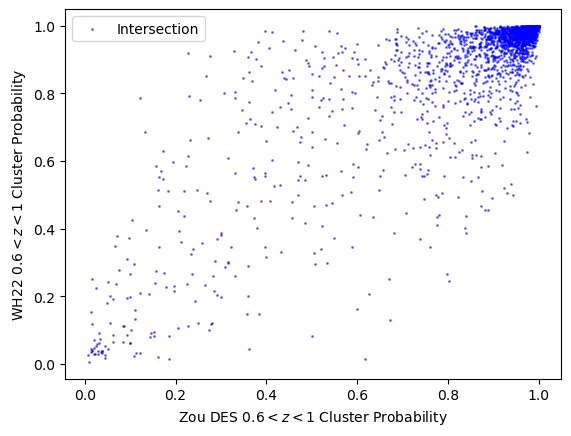

In [199]:
des_no_out = des_intersection[des_intersection.u3index.isin(outliers.u3index_des)]
wh22_no_out = wh22_intersection[wh22_intersection.u3index.isin(outliers.u3index_wh22)]

plt.scatter(des_no_out["clusterp"], wh22_no_out["clusterp"], s = 1, alpha = 0.5, c = "blue", label = "Intersection")
# plt.scatter(des_cut["clusterp"], wh22_cut["clusterp"], s = 1, alpha = 0.5, c = "magenta", label = "Cut Intersection")


plt.xlabel("Zou DES $0.6<z<1$ Cluster Probability")
plt.ylabel("WH22 $0.6<z<1$ Cluster Probability")
plt.legend()
plt.show()

In [201]:
print (r2_score(des_no_out["clusterp"], wh22_no_out["clusterp"]))

# Bruh

0.6863598293839726


In [143]:
act_disc = differences[differences.i150_r > 2]
act_disc[act_disc.Index.isin(des_cut.index)]

,u3index,amf_ra,amf_dec,z,rh,cat,glat,glon,i100,i143,...,i150_r,i220_r,iros_r,i12_r,i25_r,i60_r,i1002_r,cluster,clusterp,Index
6,NaN,0.037881,0.071404,0.011244,64.357427,NaN,0.075349,0.055187,1.231463e-05,1.544788e-05,...,2.904270,54.955731,0.000189,0.009689,0.009153,0.012174,0.002887,NaN,0.053733,26
10,NaN,0.007201,0.023808,0.070423,65.093978,NaN,0.024788,0.003679,1.338473e-05,1.981517e-06,...,4.919407,9.228036,0.000019,0.005349,0.014968,0.018550,0.018557,NaN,0.086012,47
13,NaN,0.020002,0.027601,0.037079,99.690493,NaN,0.016291,0.051635,8.607123e-06,9.546110e-06,...,2.423105,6.079148,0.000077,0.007355,0.005353,0.002622,0.009023,NaN,0.062156,58
16,NaN,0.011695,0.001817,0.036774,48.031315,NaN,0.007451,0.015042,1.260450e-06,1.708812e-06,...,2.203008,1.484059,0.000002,0.001157,0.000013,0.000318,0.001523,NaN,0.036178,66
27,NaN,0.012345,0.010425,0.081219,67.822446,NaN,0.011719,0.021158,8.250419e-06,8.189288e-06,...,6.717063,8.810328,0.000002,0.000651,0.004067,0.005333,0.005244,NaN,0.048453,128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3710,NaN,0.022708,0.007494,0.022056,64.983198,NaN,0.012010,0.007411,3.929263e-06,4.330268e-06,...,2.105621,18.124246,0.000049,0.001956,0.000363,0.002382,0.007215,NaN,0.020664,14780
3721,NaN,0.006777,0.025047,0.008255,66.306950,NaN,0.017815,0.027243,1.321009e-05,1.695273e-05,...,8.437100,17.477496,0.000035,0.001666,0.000861,0.000532,0.001644,NaN,0.006430,14815
3722,NaN,0.022417,0.002511,0.041824,92.490323,NaN,0.010089,0.007905,2.418815e-07,3.610922e-07,...,5.607962,4.488464,0.000050,0.000228,0.001075,0.000178,0.003792,NaN,0.063167,14817
3727,NaN,0.022116,0.000800,0.006223,131.598156,NaN,0.000807,0.019133,2.061980e-06,1.720838e-06,...,3.571415,17.116763,0.000055,0.002749,0.001568,0.001427,0.001277,NaN,0.007588,14840


In [144]:
act_disc[act_disc.Index.isin(des_intersection.index)]

,u3index,amf_ra,amf_dec,z,rh,cat,glat,glon,i100,i143,...,i150_r,i220_r,iros_r,i12_r,i25_r,i60_r,i1002_r,cluster,clusterp,Index
2,NaN,0.004420,0.012536,0.007251,42.310186,NaN,0.013282,0.000603,6.718787e-07,3.587992e-07,...,2.235875,0.139873,0.000130,0.002388,0.000717,0.002740,0.002844,NaN,0.106871,5
3,NaN,0.011775,0.005167,0.063770,47.644970,NaN,0.000811,0.021322,8.072428e-09,3.644633e-07,...,4.805487,6.598414,0.000010,0.002161,0.000163,0.000175,0.005377,NaN,0.156814,10
6,NaN,0.037881,0.071404,0.011244,64.357427,NaN,0.075349,0.055187,1.231463e-05,1.544788e-05,...,2.904270,54.955731,0.000189,0.009689,0.009153,0.012174,0.002887,NaN,0.053733,26
9,NaN,0.026933,0.004078,0.028391,80.121565,NaN,0.008864,0.048054,7.754469e-06,1.291351e-05,...,6.849306,18.402867,0.000047,0.001180,0.000138,0.005387,0.010206,NaN,0.131361,46
10,NaN,0.007201,0.023808,0.070423,65.093978,NaN,0.024788,0.003679,1.338473e-05,1.981517e-06,...,4.919407,9.228036,0.000019,0.005349,0.014968,0.018550,0.018557,NaN,0.086012,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3721,NaN,0.006777,0.025047,0.008255,66.306950,NaN,0.017815,0.027243,1.321009e-05,1.695273e-05,...,8.437100,17.477496,0.000035,0.001666,0.000861,0.000532,0.001644,NaN,0.006430,14815
3722,NaN,0.022417,0.002511,0.041824,92.490323,NaN,0.010089,0.007905,2.418815e-07,3.610922e-07,...,5.607962,4.488464,0.000050,0.000228,0.001075,0.000178,0.003792,NaN,0.063167,14817
3727,NaN,0.022116,0.000800,0.006223,131.598156,NaN,0.000807,0.019133,2.061980e-06,1.720838e-06,...,3.571415,17.116763,0.000055,0.002749,0.001568,0.001427,0.001277,NaN,0.007588,14840
3728,NaN,0.013555,0.003160,0.047532,82.512980,NaN,0.001967,0.012522,2.581118e-06,2.830520e-06,...,2.306471,0.295391,0.000015,0.003382,0.001554,0.000956,0.001043,NaN,0.067559,14841


## Some Samples ##

In [ ]:
awd = pd.read_csv("data/union3.csv", skiprows= 0)
awd

In [ ]:
# Catalogue 0 - AMF

awd0 = awd[awd["cat"] == 0]
fig = plt.hist2d(awd0["z"], awd0["rh"])
plt.colorbar()
plt.show()

In [ ]:
# Catalogue 1 - Zou DES

awd1 = awd[awd["cat"] == 1]
fig = plt.hist2d(awd1["z"], awd1["rh"], bins = (100,100))
plt.colorbar()
plt.show()

In [ ]:
# Catalogue 2 - Zou DESI

awd2 = awd[awd["cat"] == 2]
fig = plt.hist2d(awd2["z"], awd2["rh"], bins = (100, 100))
plt.colorbar()
plt.show()

In [ ]:
# Catalogue 3 - Zou HSC

awd3 = awd[awd["cat"] == 3]
fig = plt.hist2d(awd3["z"], awd3["rh"], bins = (100,100))
plt.colorbar()
plt.show()

In [ ]:
# Restrict richness to 1.5

# Richness is NOT the same thing across catalogues

# Title
# Integrated signal abov

In [ ]:
# Catalogue 4 - WH22

awd4 = awd[awd["cat"] == 4]
fig = plt.hist2d(awd4["z"], awd4["rh"])
plt.colorbar()
plt.show()

In [ ]:
# All Catalogues

fig = plt.hist2d(awd["z"], awd["rh"], bins = (100,100))
plt.colorbar()
plt.show()

In [ ]:
# Zou Catalogues only (1,2,3)

awd_Zou = awd[(awd["cat"] == 1) | (awd["cat"] == 2) | (awd["cat"] == 3)]
fig = plt.hist2d(awd_Zou["z"], awd_Zou["rh"], bins = (100,100))
plt.colorbar()
plt.show()

## Trying to Manually Find Cumulative Distribution Function - WH22

In [ ]:
catalogue = 0
z_lb = 0
z_hb = 5
rh_lb = 0
rh_hb = 50
bin_num = 20

cat_names = ["AMF", "Zou DES", "Zou DESI", "Zou HSC", "WH22"]

awd_cat = awd[(awd["cat"] == catalogue) & (awd["z"] >= z_lb) & (awd["z"] <= z_hb) 
               & (awd["rh"] >= rh_lb) & (awd["rh"] <= rh_hb)]
plt.hist2d(awd_cat["z"], awd_cat["rh"], bins = (bin_num, bin_num))
plt.title("Between redshifts " + str(z_lb) + "$\leq$z$\leq$" + str(z_hb), fontsize = 12)
plt.xlabel("Redshift, z")
plt.ylabel("Richness, rh")

plt.suptitle(cat_names[catalogue] + " Non-integrated Distribution", fontsize = 16)
plt.colorbar()
plt.show()

In [ ]:
# Understanding the "Integrated" code:

# Histdata is an array storing the histogram value (color) at each coordinate.
# xbins and ybins keep track of the bin edges along the axes
# mesh is irrelevant here
# Change number of bins here

hist_data, xbins, ybins, mesh = plt.hist2d(awd_cat["z"], awd_cat["rh"], bins = (bin_num, bin_num))

# Integrate this histogram data. 
# Pandas cumsum (different from np cumsum - look it up) over the data. axis = 0 is adding each row to the next one.
hist_data = hist_data.cumsum(axis = 0).cumsum(axis = 1)

# Matplotlib pcolormesh is used to plot a color map
plt.pcolormesh(xbins, ybins, hist_data)
plt.suptitle(cat_names[catalogue] + " Integrated Distribution", fontsize = 16)
plt.title("Between redshifts " + str(z_lb) + "$\leq$z$\leq$" + str(z_hb), fontsize = 12, x = 0.6)
plt.xlabel("Redshift, z")
plt.ylabel("Richness, rh")
plt.colorbar()
plt.show()

In [ ]:
# Lookup for objects in certain range:

catalogue = 3
z_lb = 1
z_hb = 5
rh_lb = 0
rh_hb = 500

awd_check = awd[(awd["cat"] == catalogue) & (awd["z"] >= z_lb) & (awd["z"] <= z_hb) 
               & (awd["rh"] >= rh_lb) & (awd["rh"] <= rh_hb)]

print("Size: " + str(len(awd_check)))

In [ ]:
# Using to find for other catalogues:

# Insert here

# How to find intersections? It seems like the union3 file, etc. was
# made such that duplicates from one catalogue were dropped?? idk

## Failed Attempts

In [ ]:
# Another Failed Attempt

# awd_WH22_int = awd_WH22.sort_values(by = "z")
# awd_WH22_int["z_cum"] = np.cumsum(awd_WH22_int["z"], axis = 0)
# awd_WH22_int["rh_cum"] = np.cumsum(awd_WH22_int["rh"], axis = 0)

# fig = plt.hist2d(awd_WH22_int["z_cum"], awd_WH22_int["rh_cum"], bins = (20,20))
# plt.suptitle("WH22 Integrated Distribution", fontsize = 16)
# plt.title("Between redshifts " + str(z_lb) + "$\leq$z$\leq$" + str(z_hb), fontsize = 12, x = 0.6)

# plt.colorbar()
# plt.show()